In [29]:
import pandas as pd
import numpy as np

import random

from statistics import stdev
from scipy.stats import mode

from IPython.display import IFrame, display

import matplotlib.pyplot as plt
import seaborn as sns


from feature_selector_method.feature_selector import FeatureSelector


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None




data_path = '../../data/sim1/forecasting_markers/'
figure_path = '../../figure/sim1/forecasting_markers/'

In [30]:
final_df = pd.read_csv(data_path + "data_3.csv")
final_df.head()

Subject  Drive  Age  STAI  Type_AB  Effort  Frustration  Mental_Demand  \
0        2      2   23    40       97    17.0         11.0           18.0   
1        2      2   23    40       97    17.0         11.0           18.0   
2        2      2   23    40       97    17.0         11.0           18.0   
3        2      2   23    40       97    17.0         11.0           18.0   
4        2      2   23    40       97    17.0         11.0           18.0   

   Performance  Physical_Demand  Temporal_Demand  NASA_Total_Sum  \
0          8.0             12.0             11.0            77.0   
1          8.0             12.0             11.0            77.0   
2          8.0             12.0             11.0            77.0   
3          8.0             12.0             11.0            77.0   
4          8.0             12.0             11.0            77.0   

   NASA_Total_Sum_Normalized  Effort_Normalized  Frustration_Normalized  \
0                       21.0                7.0                     5.0   
1                       21.0                7.0                     5.0   
2                       21.0                7.0                     5.0   
3                       21.0                7.0                     5.0   
4                       21.0                7.0                     5.0   

   Mental_Demand_Normalized  Performance_Normalized  \
0                       2.0                     4.0   
1                       2.0                     4.0   
2                       2.0                     4.0   
3                       2.0                     4.0   
4                       2.0                     4.0   

   Physical_Demand_Normalized  Temporal_Demand_Normalized PP_Arousal_Mode  \
0                         3.0                         0.0         relaxed   
1                         3.0                         0.0         relaxed   
2                         3.0                         0.0         relaxed   
3                         3.0                         0.0         relaxed   
4                         3.0                         0.0         relaxed   

  PP_2_Arousal_Mode HR_Arousal_Mode BR_Arousal_Mode  Perinasal_Mean  \
0           relaxed        stressed         relaxed       -5.234157   
1           relaxed        stressed         relaxed       -5.310385   
2           relaxed        stressed         relaxed       -5.301983   
3           relaxed         relaxed         relaxed       -5.376241   
4           relaxed        stressed         relaxed       -5.412159   

   Perinasal_Median  Perinasal_SD  Perinasal_SS  Palm_Mean  Palm_Median  \
0         -5.225352      0.022537    273.968589   4.381546     4.383529   
1         -5.314152      0.010595    282.002952   4.412968     4.424510   
2         -5.300184      0.007855    281.110844   4.478699     4.477713   
3         -5.384108      0.022728    289.044320   4.489221     4.487858   
4         -5.415029      0.008453    292.915248   4.536543     4.540467   

    Palm_SD     Palm_SS  Hr_Mean  Hr_Median     Hr_SD     Hr_SS  Br_Mean  \
0  0.028919  191.986960    90.34       90.3  1.484887  81633.00   11.052   
1  0.041499  194.758371    91.20       90.6  1.366260  83191.20   12.004   
2  0.008636  200.588144    90.08       90.3  1.347261  81160.40   13.108   
3  0.006843  201.531470    86.64       86.8  1.188089  75077.60   14.164   
4  0.010252  205.803182    86.70       87.6  1.708150  75195.16   15.488   

   Br_Median     Br_SD      Br_SS  Gender_Female  Gender_Male  Drive_Label_CD  \
0      11.05  0.162809  1221.7056              1            0               1   
1      12.10  0.352742  1442.0800              1            0               1   
2      13.10  0.355928  1719.3368              1            0               1   
3      14.08  0.319138  2007.1056              1            0               1   
4      15.55  0.339830  2399.8208              1            0               1   

   Drive_Label_ED  Drive_Label_MD  Nasa_Cluster_High  Nasa_Clust

In [31]:
final_df.columns

Index(['Subject', 'Drive', 'Age', 'STAI', 'Type_AB', 'Effort', 'Frustration',
       'Mental_Demand', 'Performance', 'Physical_Demand', 'Temporal_Demand',
       'NASA_Total_Sum', 'NASA_Total_Sum_Normalized', 'Effort_Normalized',
       'Frustration_Normalized', 'Mental_Demand_Normalized',
       'Performance_Normalized', 'Physical_Demand_Normalized',
       'Temporal_Demand_Normalized', 'PP_Arousal_Mode', 'PP_2_Arousal_Mode',
       'HR_Arousal_Mode', 'BR_Arousal_Mode', 'Perinasal_Mean',
       'Perinasal_Median', 'Perinasal_SD', 'Perinasal_SS', 'Palm_Mean',
       'Palm_Median', 'Palm_SD', 'Palm_SS', 'Hr_Mean', 'Hr_Median', 'Hr_SD',
       'Hr_SS', 'Br_Mean', 'Br_Median', 'Br_SD', 'Br_SS', 'Gender_Female',
       'Gender_Male', 'Drive_Label_CD', 'Drive_Label_ED', 'Drive_Label_MD',
       'Nasa_Cluster_High', 'Nasa_Cluster_Low', 'PP_HR_Arousal_Mode',
       'PP_BR_Arousal_Mode', 'HR_BR_Arousal_Mode', 'PP_HR_BR_Arousal_Mode'],
      dtype='object')

In [32]:
final_df.describe()

Subject        Drive          Age         STAI      Type_AB  \
count  6390.000000  6390.000000  6390.000000  6390.000000  6390.000000   
mean     35.666823     3.014085    43.714241    32.968232    49.602504   
std      23.118468     0.817588    23.460274     8.403062    31.679824   
min       2.000000     2.000000    21.000000    20.000000     0.000000   
25%      18.000000     2.000000    22.000000    25.000000    20.000000   
50%      33.000000     3.000000    25.000000    32.000000    49.000000   
75%      47.000000     4.000000    70.000000    40.000000    82.000000   
max      84.000000     4.000000    81.000000    52.000000    99.000000   

            Effort  Frustration  Mental_Demand  Performance  Physical_Demand  \
count  6390.000000  6390.000000    6390.000000  6390.000000      6390.000000   
mean     12.003599     9.078091      12.606964     9.093584         9.033333   
std       5.181982     5.731791       4.917477     5.401497         5.381224   
min       2.000000     1.000000       3.000000     1.000000         1.000000   
25%       7.000000     4.000000      10.000000     4.000000         4.000000   
50%      13.000000     8.000000      13.000000     8.000000         9.000000   
75%      17.000000    14.000000      17.000000    12.000000        13.000000   
max      20.000000    20.000000      20.000000    20.000000        20.000000   

       Temporal_Demand  NASA_Total_Sum  NASA_Total_Sum_Normalized  \
count      6390.000000     6390.000000                6390.000000   
mean          9.353052       61.168623                  22.984977   
std           4.467750       26.154570                  25.762294   
min           1.000000       15.000000                 -29.000000   
25%           6.000000       39.000000                   5.000000   
50%          10.000000       61.000000                  20.000000   
75%          13.000000       80.000000                  44.000000   
max          20.000000      120.000000                  76.000000   

       Effort_Normalized  Frustration_Normalized  Mental_Demand_Normalized  \
count        6390.000000             6390.000000               6390.000000   
mean            3.636228                4.261659                  4.314006   
std             6.149589                5.773941                  5.730557   
min           -12.000000               -8.000000                -12.000000   
25%            -1.000000                0.000000                  1.000000   
50%             3.000000                3.000000                  4.000000   
75%             8.000000                9.000000                  8.000000   
max            16.000000               19.000000                 19.000000   

       Performance_Normalized  Physical_Demand_Normalized  \
count             6390.000000                 6390.000000   
mean                 3.880751                    2.847731   
std                  6.114108                    4.731032   
min                -14.000000                   -7.000000   
25%                  1.000000                    0.000000   
50%                  4.000000                    2.000000   
75%                  8.000000                    6.000000   
max                 18.000000                   13.000000   

       Temporal_Demand_Normalized  Perinasal_Mean  Perinasal_Median  \
count                 6390.000000     6390.000000       6390.000000   
mean                     4.044601       -5.122087         -5.122430   
std                      5.000271        0.241875          0.242280   
min                     -9.000000       -5.706820         -5.713246   
25%                      1.000000       -5.263623         -5.263779   
50%                      3.000000       -5.175722         -5.176753   
75%                      9.000000       -5.043806         -5.043697   
max                     15.000000       -3.484398         -3.489295   

       Perinasal_SD  Perinasal_SS    Palm_Mean  Palm_Median      Palm_SD  \
count   6390.000000   6390.00000

In [33]:
def get_drive_name(drive):
    if drive == 2:
        return 'CD'
    elif drive == 3:
        return 'MD'
    elif drive == 4:
        return 'ED'
    elif drive == 5:
        return 'FD'


def get_test_subjs(arousal_signal):
    
    ######################################
    # 'PP', 'PP_2', 'HR', 'BR', 'PP_HR_BR'
    ######################################
    
    if arousal_signal == 'PP':
        #####################################
        # return [2, 31, 66, 47, 44, 25, 24]
        #####################################
        return [18, 23, 16, 25, 8, 45, 2]
    
    elif arousal_signal == 'PP_2':
        return [44, 20, 16, 68, 33, 60, 18]
    
    elif arousal_signal == 'HR':
        return [61, 29, 24, 38, 84, 2, 17]
    
    elif arousal_signal == 'BR':
        return [44, 62, 81, 20, 61, 38, 79]
    
    elif arousal_signal == 'PP_HR_BR':
        return [31, 66, 16, 29, 62, 44, 36]
    




def get_splitted_data(final_df, feature_list, arousal_signal, predict_col, random_selection = False):
    
    unique_subjs = final_df.Subject.unique()
    
    df_arousal_count = final_df.groupby(['Arousal_Mode']).agg({'Arousal_Mode': 'count'})
    df_arousal_count = df_arousal_count.apply(lambda x: 100 * x / float(x.sum()))
    # print(df_arousal_count.head(2))

    ########################################################################
    '''
    train_subj_end = 65

    train_df = final_df[final_df.Subject < train_subj_end]
    test_df = final_df[final_df.Subject >= train_subj_end]
    
    train_subjs = train_df.Subject.unique()
    test_subjs = test_df.Subject.unique()
    
    print('\n\nTest Subjects -->\n', test_subjs)
    '''
    ########################################################################
    
    
    
    ########################################################################
    # '''
    if random_selection:
        test_subjs = random.sample(list(final_df.Subject.unique()), 7)
    else:
        test_subjs = get_test_subjs(arousal_signal)
        
    train_subjs = [subj for subj in unique_subjs if subj not in test_subjs]
    
    train_df = final_df[final_df.Subject.isin(train_subjs)]
    test_df = final_df[final_df.Subject.isin(test_subjs)]
    
    print('\n\nTest Subjects -->\n', test_subjs)
    # '''
    ########################################################################
    
    
    
    print('\n\nTotal Train Subjects: ' + str(len(train_subjs)) + '    Percentage: ' + str(round(100*len(train_subjs)/len(unique_subjs), 2)) + '%')
    print('Total Test Subjects: ' + str(len(test_subjs)) + '    Percentage: ' + str(round(100*len(test_subjs)/len(unique_subjs), 2)) + '%' + '\n\n')


    train_df_arousal_count = train_df.groupby(['Arousal_Mode']).agg({'Arousal_Mode': 'count'})
    train_df_arousal_count = train_df_arousal_count.apply(lambda x: 100 * x / float(x.sum()))
    print('Train Data Percentage -->')
    print(train_df_arousal_count)


    test_df_arousal_count = test_df.groupby(['Arousal_Mode']).agg({'Arousal_Mode': 'count'})
    test_df_arousal_count = test_df_arousal_count.apply(lambda x: 100 * x / float(x.sum()))
    print('\nTest Data Percentage -->')
    print(test_df_arousal_count)


    print('\n\nTotal Train Rows: ' + str(len(train_df)) + '    Percentage: ' + str(round(100*len(train_df)/len(final_df), 2)) + '%')
    print('Total Test Rows: ' + str(len(test_df)) + '    Percentage: ' + str(round(100*len(test_df)/len(final_df), 2)) + '%' + '\n\n')

    
    X_train = train_df[feature_list]
    y_train = train_df[[predict_col]]

    X_test = test_df[feature_list]
    y_test = test_df[[predict_col]]
    
    return X_train, y_train, X_test, y_test, train_df, test_df

In [34]:
# feature_list = [
#     'Perinasal_Mean', 'Perinasal_SD',
#     'Palm_Mean', 'Palm_SD', 
#     'Hr_Mean', 'Hr_SD',
#     'Br_Mean', 'Br_SD',
#     'Drive_Label_CD', 'Drive_Label_ED', 
#     'Drive_Label_FD', 'Drive_Label_MD'
# ]


feature_list = [
    'Age', 'STAI', 'Type_AB', 
    
    'Effort', 'Frustration', 'Mental_Demand', 'Performance', 'Physical_Demand', 'Temporal_Demand',
    'NASA_Total_Sum', 'NASA_Total_Sum_Normalized', 
    'Effort_Normalized', 'Frustration_Normalized', 'Mental_Demand_Normalized',
    'Performance_Normalized', 'Physical_Demand_Normalized', 'Temporal_Demand_Normalized', 


    'Perinasal_Mean', 'Perinasal_SD', 'Perinasal_Median', 'Perinasal_SS', 
    'Palm_Mean', 'Palm_SD', 'Palm_Median', 'Palm_SS', 
    'Hr_Mean', 'Hr_SD', 'Hr_Median', 'Hr_SS', 
    'Br_Mean', 'Br_SD', 'Br_Median', 'Br_SS',
    
#     'Perinasal_Mean', 'Perinasal_SD',
#     'Palm_Mean', 'Palm_SD',
#     'Hr_Mean', 'Hr_SD',
#     'Br_Mean', 'Br_SD',
    
    'Gender_Female', 'Gender_Male', 
    'Drive_Label_CD', 'Drive_Label_ED', 'Drive_Label_MD', 
    'Nasa_Cluster_High', 'Nasa_Cluster_Low',

]



model = RandomForestClassifier(n_estimators = 200,
                               max_features = 'auto',
                               bootstrap = True)

In [35]:
def get_confusion_matrix(arousal_signal, final_df, test_df, y_test, y_pred, do_normalize):
    
    #####################################################################################
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    sns.set(font_scale=1.4)
    
    #-------------------------------------------------------------#
    # labels = ["normal", "relaxed", "stressed", "unknown"]
    # labels = ["relaxed", "normal", "unknown", "stressed"]
    # labels = ["relaxed", "stressed"]
    labels = sorted(final_df.Arousal_Mode.unique())
    #-------------------------------------------------------------#
    
    if do_normalize:
        conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels, normalize='all'))
        sns.heatmap(conf_mat*100, annot=True, annot_kws={"size": 16})
        plt.title('Confusion Matrix - ' + arousal_signal + ' %')
        plot_name = arousal_signal.lower() + '_percentage'
        
    else:
        conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels))
        sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size": 16})
        plt.title('Confusion Matrix - ' + arousal_signal)
        plot_name = arousal_signal.lower() 

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # plt.show()

    plt.savefig(figure_path + plot_name + '_confusion_matrix.png')
    plt.savefig(figure_path + plot_name + '_confusion_matrix.pdf')
    #####################################################################################
    
    

def get_all_confusion_matrices(arousal_signal, final_df, test_df, y_test, y_pred):

    get_confusion_matrix(arousal_signal, final_df, test_df, y_test, y_pred, do_normalize=False)
    get_confusion_matrix(arousal_signal, final_df, test_df, y_test, y_pred, do_normalize=True)

    #####################################################################################
    # print('\n\nConfusion Matrix:')
    # print(pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels)))
    #####################################################################################
    
    
    #####################################################################################
    labels = sorted(final_df.Arousal_Mode.unique())
    fig, axs = plt.subplots(3, figsize = (12, 36))
    fig.suptitle(arousal_signal)

    for i, drive in enumerate(test_df.Drive.unique()):
        drive_test_df = test_df.copy()[test_df.Drive == drive]
        y_test_drive = drive_test_df.Arousal_Mode
        y_pred_drive = drive_test_df.Prediction

        conf_mat = pd.DataFrame(confusion_matrix(y_test_drive, y_pred_drive, labels = labels))
        axis = axs[i]

        sns.set(font_scale=1.4)
        sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size": 16}, ax = axis)
        
        axis.title.set_text(get_drive_name(drive))
        axis.set_xticklabels(labels)
        axis.set_yticklabels(labels)
        axis.set_xlabel('Predicted')
        axis.set_ylabel('Actual')

        # plt.show()

    plt.savefig(figure_path + arousal_signal.lower() + '_drive_confusion_matrix.png')
    plt.savefig(figure_path + arousal_signal.lower() + '_drive_confusion_matrix.pdf')
    #####################################################################################
    

    
    
    
    
def get_feature_importance(model, X_train, arousal_signal):
    
    df_feature_importance = pd.DataFrame(model.feature_importances_, 
                                     index=X_train.columns, 
                                     columns=['feature importance']).sort_values('feature importance', ascending=False)
    feature_imp = pd.Series(model.feature_importances_,
                            index=X_train.columns).sort_values(ascending=False)

    plt.figure(figsize=(25, 12))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    
    plt.xlabel('Feature Importance Score', fontsize=18)
    plt.ylabel('Features', fontsize=18)
    plt.title(arousal_signal + ' - Important Features', fontsize=18)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.yticks(rotation=30)
    plt.savefig(figure_path + arousal_signal.lower() + '_feature_importance.png')
    plt.savefig(figure_path + arousal_signal.lower() + '_feature_importance.pdf')

    plt.show()

    
    
    
def get_bootstrap_results(final_df, feature_list, arousal_signal, random_selection):

    #####################################################################################
    arousal_col = arousal_signal + '_Arousal_Mode'

    # 'PP_Arousal_Mode', 'HR_Arousal_Mode', 'BR_Arousal_Mode'
    # 'PP_HR_Arousal_Mode', 'HR_BR_Arousal_Mode', 'PP_HR_BR_Arousal_Mode'
    #####################################################################################




    #####################################################################################
    final_df['Arousal_Mode'] = final_df[arousal_col]
    # print(final_df.Arousal_Mode.unique())
    #####################################################################################




    #####################################################################################
    #                               Feature Seletion
    #####################################################################################
    X_train, y_train, X_test, y_test, train_df, test_df = get_splitted_data(final_df, 
                                                                            feature_list,
                                                                            arousal_signal,
                                                                            'Arousal_Mode', 
                                                                            random_selection = random_selection)
    
    
    
    #####################################################################################    
    fs = FeatureSelector(data = X_train, labels = y_train)
    
    
    fs.identify_missing(missing_threshold=0.6)
    fs.plot_missing()
    
#     missing_features = fs.ops['missing']
#     print(missing_features[:10])
#     print(fs.missing_stats.head(10))
    
    
    
    
    
    
#     fs.identify_collinear(correlation_threshold=0.9)
#     fs.plot_collinear()
#     fs.plot_collinear(plot_all=True)

    fs.identify_collinear(correlation_threshold=0.8)
    fs.plot_collinear()

#     correlated_features = fs.ops['collinear']
#     print(correlated_features[:5])
#     print(fs.record_collinear.head())
    
    
    
    
    
    
    
    fs.identify_zero_importance(task = 'classification', 
                                eval_metric = 'auc',
                                n_iterations = 10, 
                                early_stopping = False)
    
    one_hot_features = fs.one_hot_features
    base_features = fs.base_features
    zero_importance_features = fs.ops['zero_importance']
    
#     print('There are %d original features' % len(base_features))
#     print('There are %d one-hot features' % len(one_hot_features))
#     print(zero_importance_features[10:15])
    
    
    
    
    
    

    fs.plot_feature_importances(threshold = 0.99)
#     fs.plot_feature_importances(threshold = 0.99, plot_n = 12)
#     print(fs.feature_importances.head(10))
    
    
    
    
    
    fs.identify_low_importance(cumulative_importance = 0.99)
#     low_importance_features = fs.ops['low_importance']
#     print(low_importance_features[:5])
    #####################################################################################
    
    
    
    
    
    #####################################################################################
    fs = FeatureSelector(data = X_train, labels = y_train)
    fs.identify_all(selection_params = {'missing_threshold': 0.6, 
                                        'correlation_threshold': 0.8,
                                        'task': 'classification', 
                                        'eval_metric': 'auc',
                                        'cumulative_importance': 0.99})
    
    train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)
    removed_features = set(list(X_train.columns)) - set(list(train_removed_all_once.columns))
    print(removed_features)
    #####################################################################################
    
    
    
    #####################################################################################
    selected_feature_list = train_removed_all_once.columns
    print('\n------ Selected Features ------')
    print(selected_feature_list)
    print('\n-------------------------------\n')
    #####################################################################################
    
    
    
    
    #####################################################################################
    #                               MODELING
    #####################################################################################
    X_train, y_train, X_test, y_test, train_df, test_df = get_splitted_data(final_df, 
                                                                            selected_feature_list,
                                                                            arousal_signal,
                                                                            'Arousal_Mode', 
                                                                            random_selection = random_selection)

    
    
    
    #####################################################################################
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_df['Prediction'] = y_pred
    
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)

    print('Accuracy: ' + str(round(accuracy_score(y_test, y_pred), 2)))
#     print('Auc: ' + str(round(auc(fpr, tpr))))
    print('F1: ' + str(round(f1_score(y_test, y_pred, average='weighted'), 2)))
    print('Recall: ' + str(round(recall_score(y_test, y_pred, average='weighted'), 2)))
    print('Precision: ' + str(round(precision_score(y_test, y_pred, average='weighted'), 2)))
    #####################################################################################
    
    
    
    #####################################################################################
    #                         Feature Importance
    #####################################################################################
    get_feature_importance(model, X_train, arousal_signal)
    #####################################################################################
    
    
    #####################################################################################
    #                              PLOTTING
    #####################################################################################
    get_all_confusion_matrices(arousal_signal, final_df, test_df, y_test, y_pred)
    #####################################################################################
    
    
    
    #####################################################################################
    #                        Classification Probabilities
    #####################################################################################
    y_pred_probabilities = model.predict_proba(X_test)
    # print(y_pred_probabilities)
    
    test_df["Relaxed_Prob"], test_df["Stress_Prob"] = y_pred_probabilities[:,0], y_pred_probabilities[:,1]
    test_df.to_csv('../../data/sim1/forecasting_markers/' + arousal_signal.lower() + '_pred_result_df.csv', sep=',')
    
    
#     test_df_mean = test_df[['Prediction', 'Relaxed_Prob', 'Stress_Prob']].groupby(['Prediction']).agg({'Relaxed_Prob': 'mean', 'Stress_Prob': 'mean'})
#     test_df_mean = test_df_mean.apply(lambda x: round(100 * x, 2))
#     print(test_df_mean, '\n')
    #####################################################################################

----------------------------------------------------
------------------------ PP ------------------------
----------------------------------------------------



Test Subjects -->
 [18, 23, 16, 25, 8, 45, 2]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          76.192417
stressed         23.807583

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          89.016173
stressed         10.983827


Total Train Rows: 4906    Percentage: 76.78%
Total Test Rows: 1484    Percentage: 23.22%


0 features with greater than 0.60 missing values.

17 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



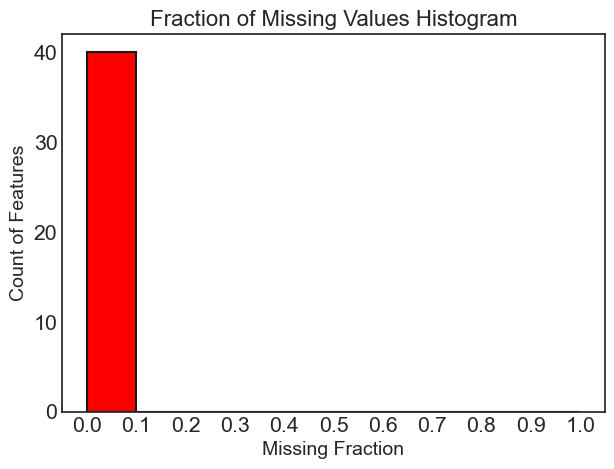

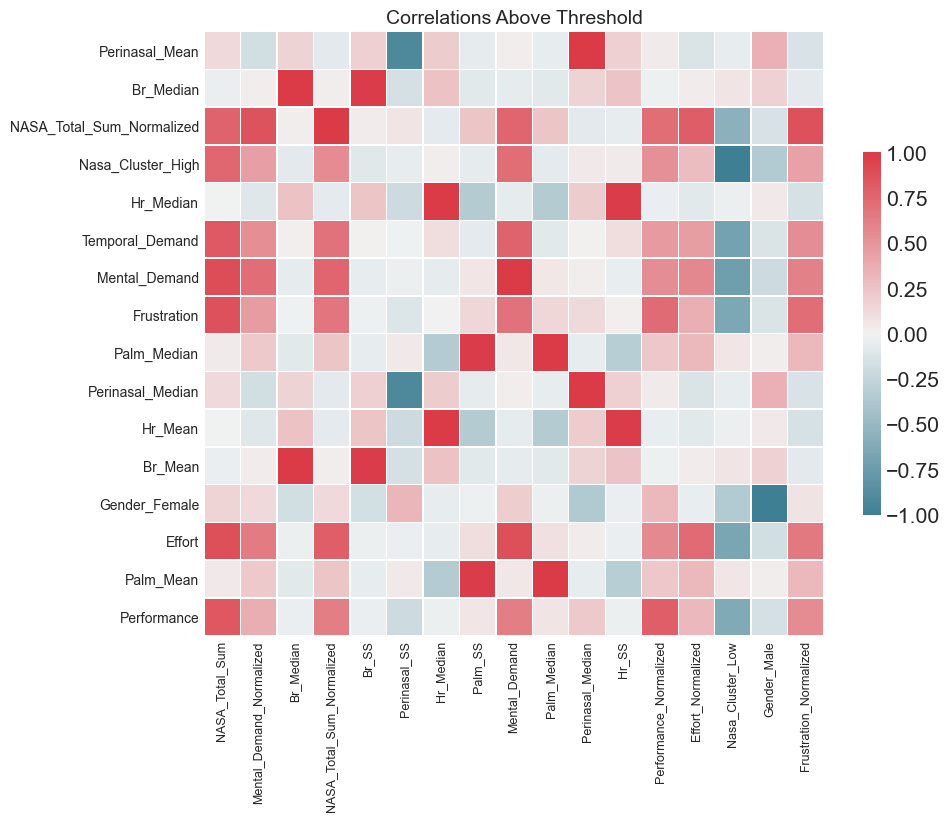

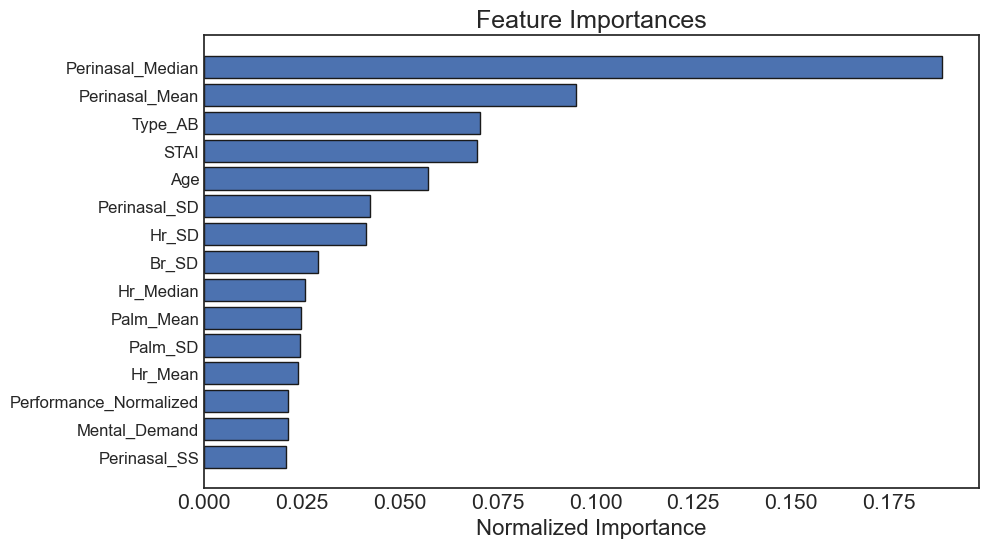

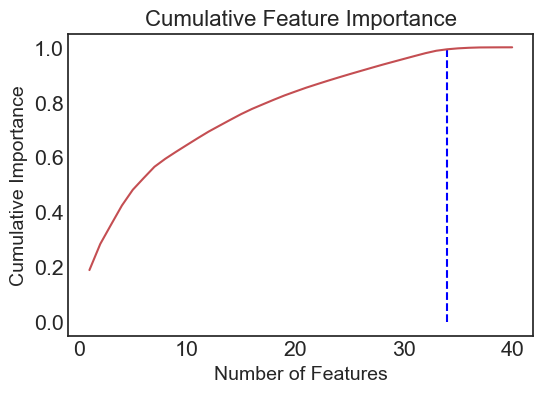

34 features required for 0.99 of cumulative importance
33 features required for cumulative importance of 0.99 after one hot encoding.
7 features do not contribute to cumulative importance of 0.99.

0 features with greater than 0.60 missing values.

0 features with a single unique value.

17 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[206]	valid_0's auc: 0.999817	valid_0's binary_logloss: 0.0158032
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.997117	valid_0's binary_logloss: 0.0505998
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[195]	valid_0's auc: 0.999633	valid_0's binary_logloss: 0.0198534
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[189]	valid_0's auc: 0.99945	va

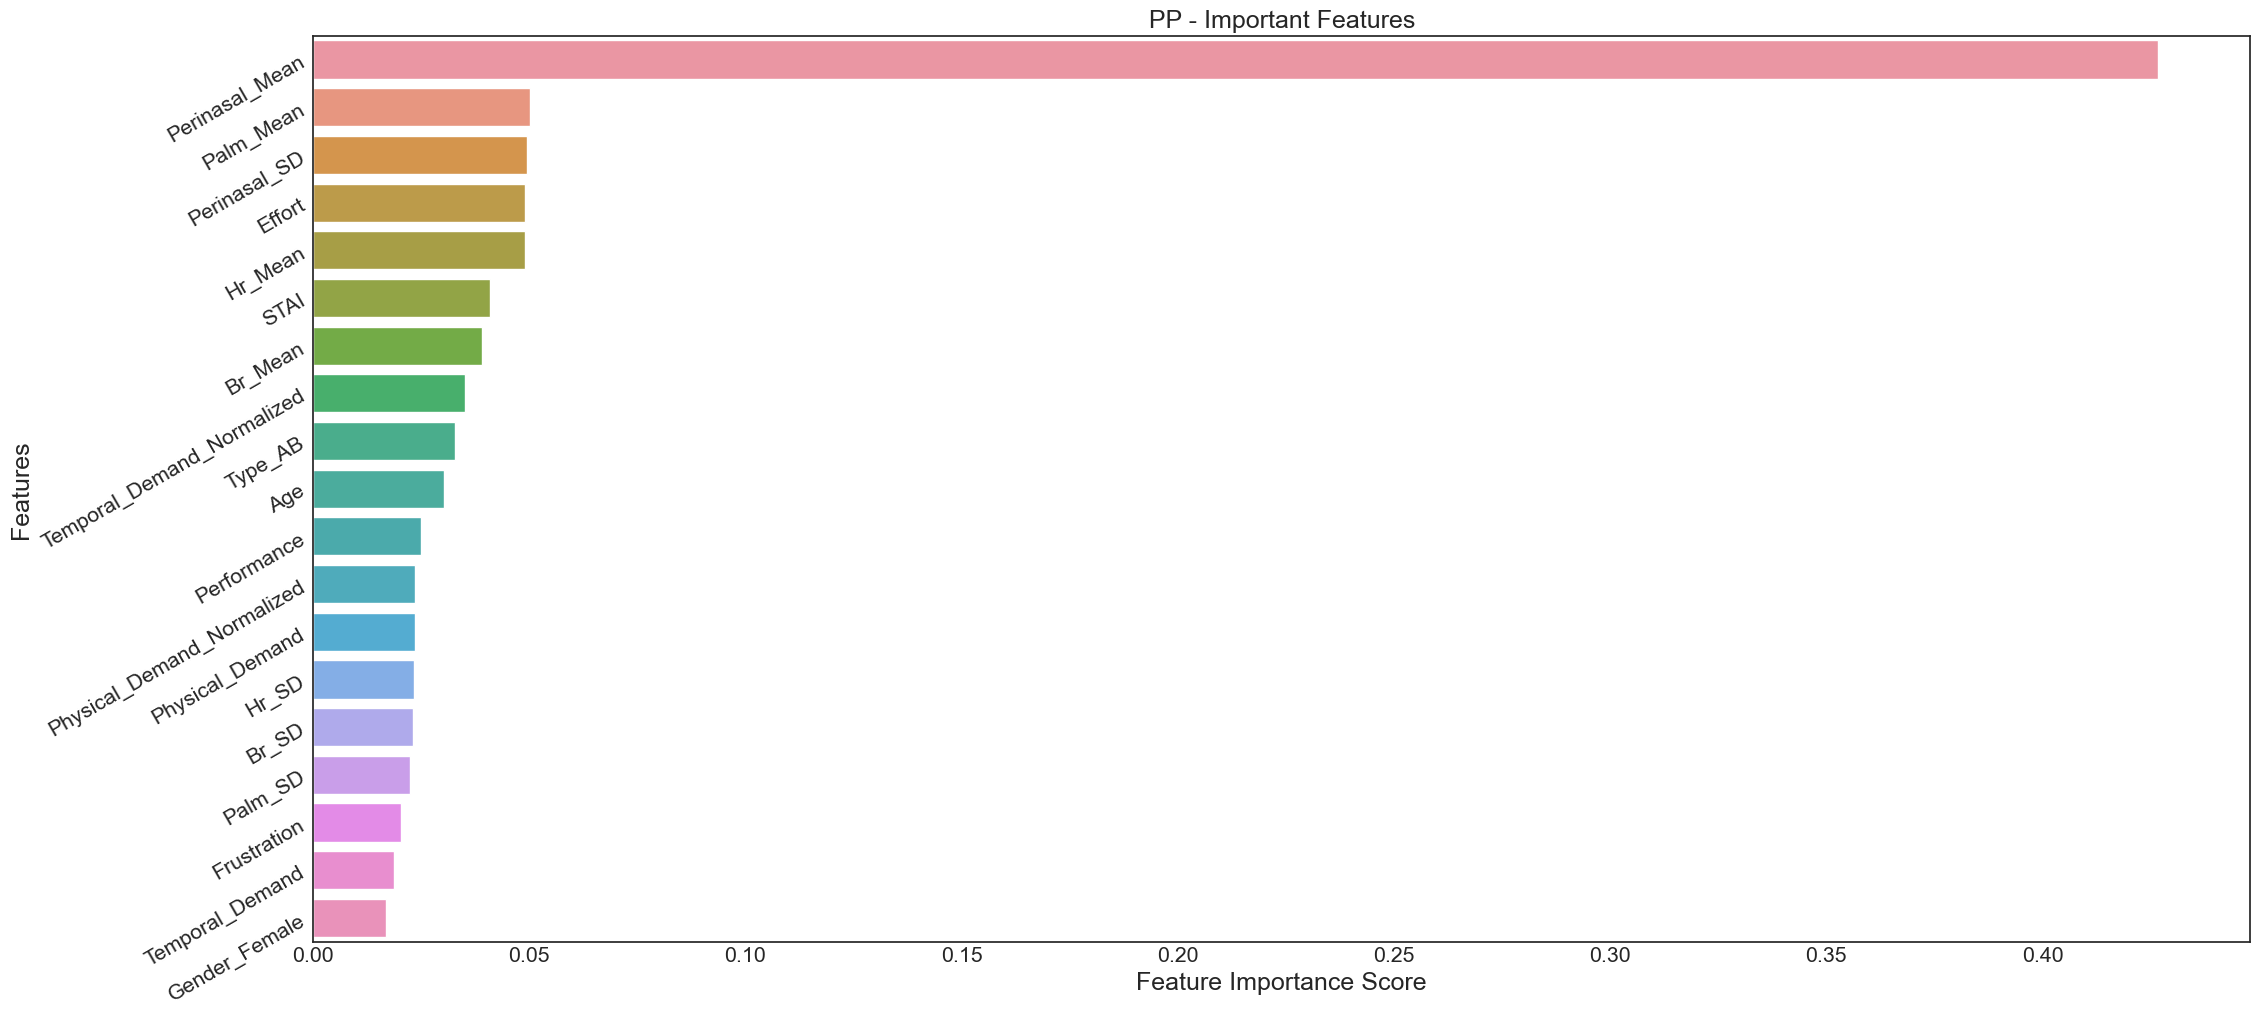











----------------------------------------------------
------------------------ PP_2 ------------------------
----------------------------------------------------



Test Subjects -->
 [44, 20, 16, 68, 33, 60, 18]


Total Train Subjects: 25    Percentage: 80.65%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          57.091633
stressed         42.908367

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          74.744526
stressed         25.255474


Total Train Rows: 5020    Percentage: 78.56%
Total Test Rows: 1370    Percentage: 21.44%


0 features with greater than 0.60 missing values.

14 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



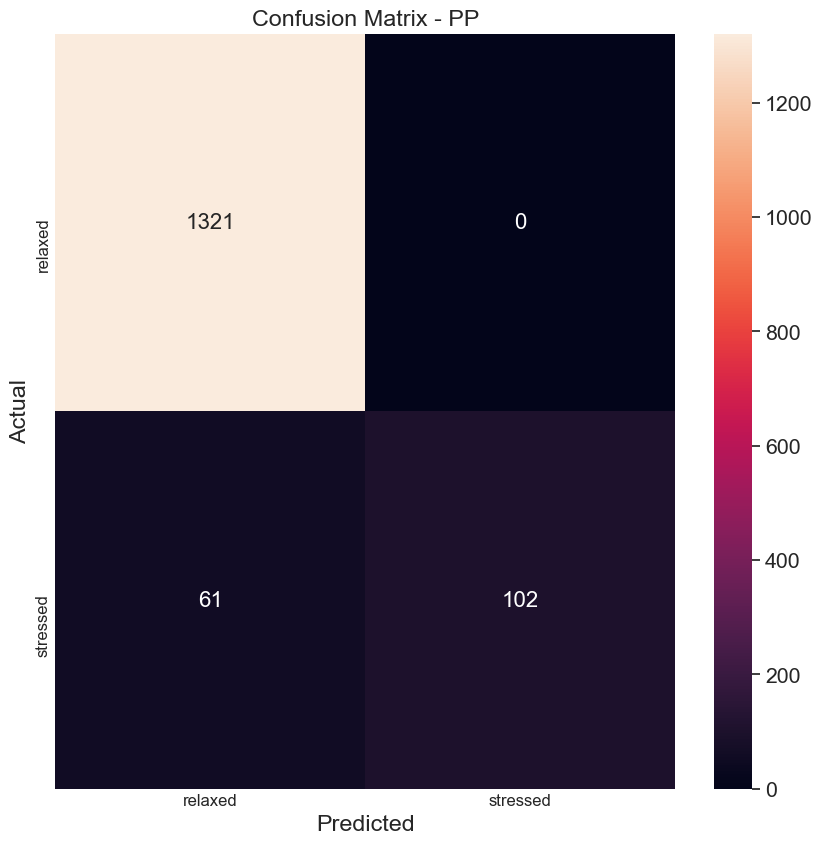

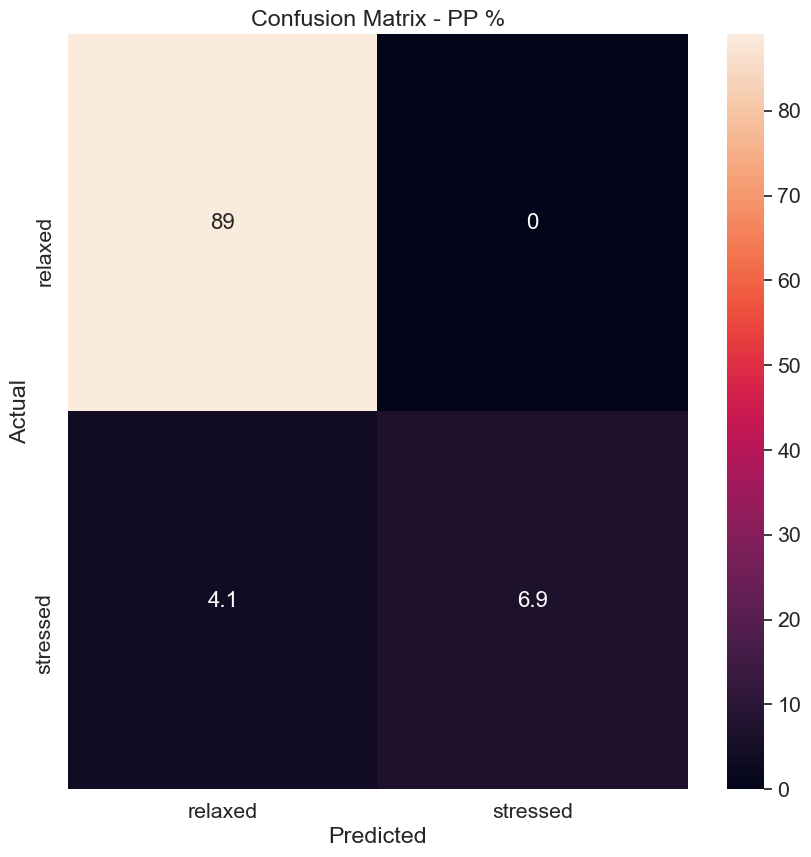

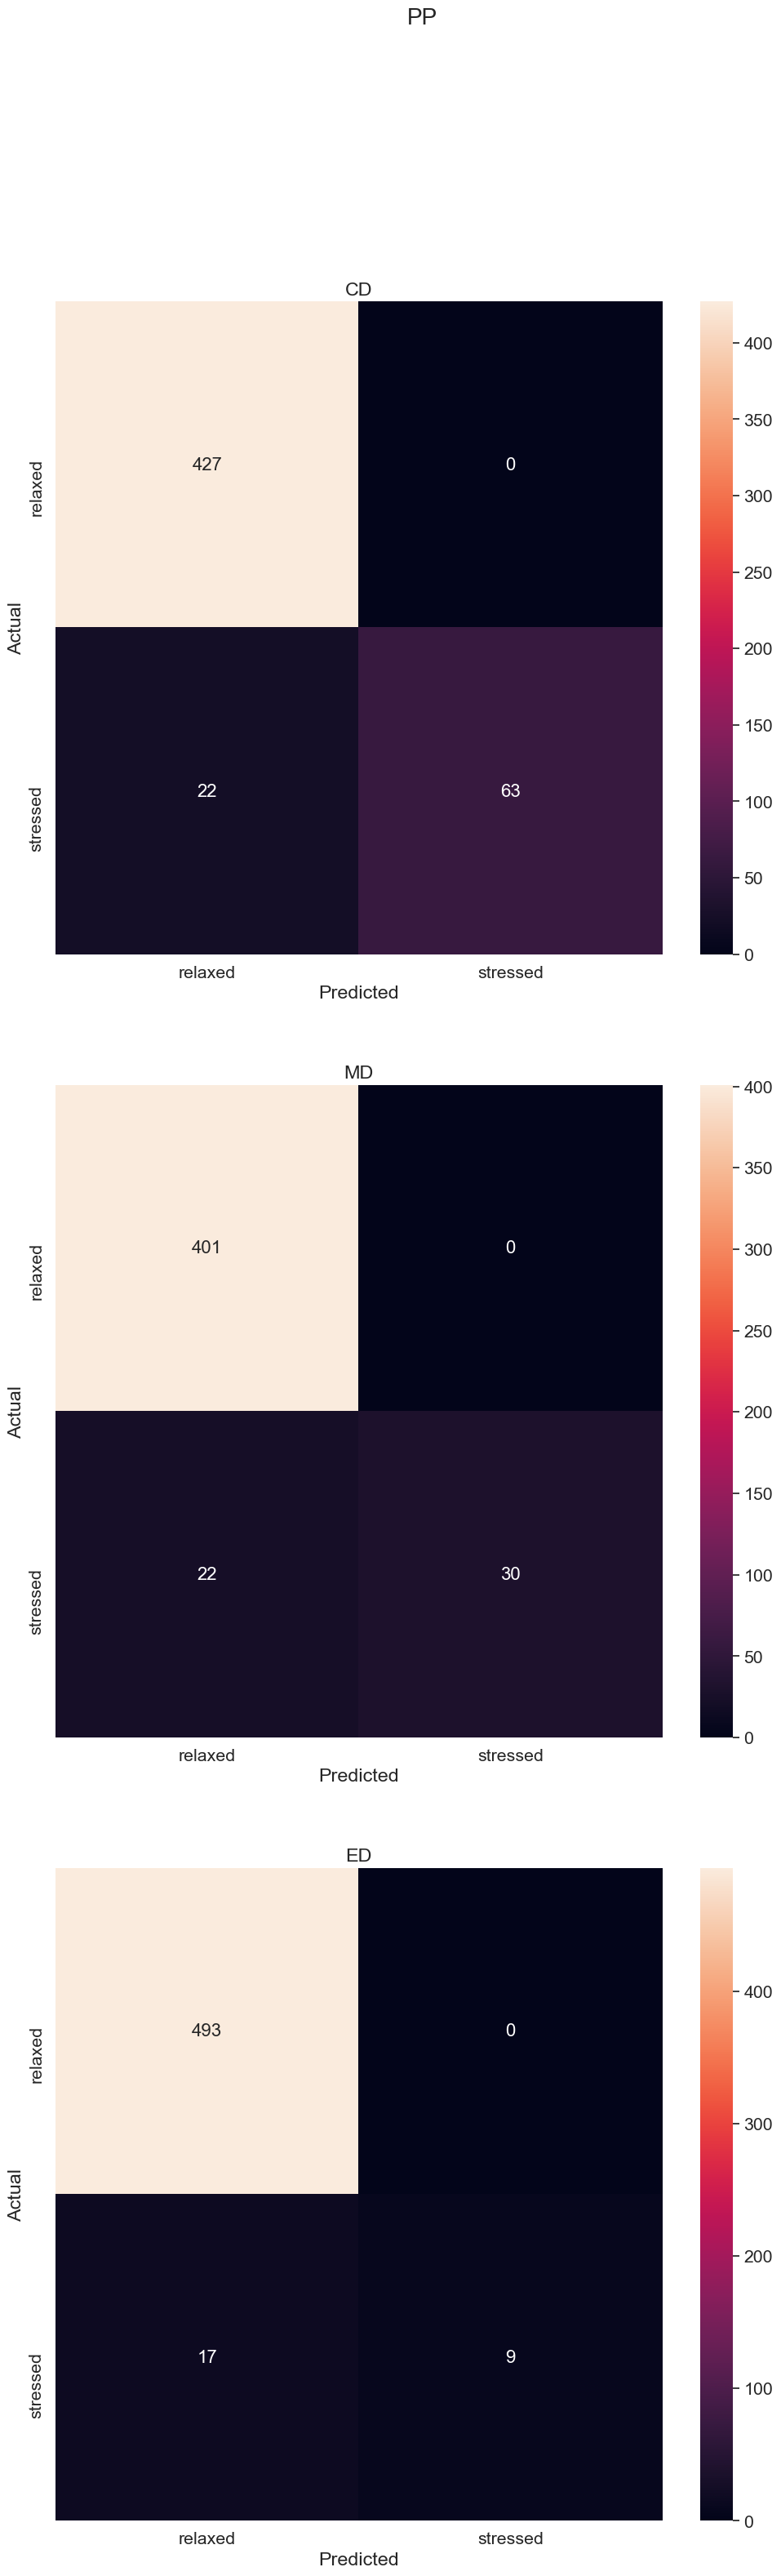

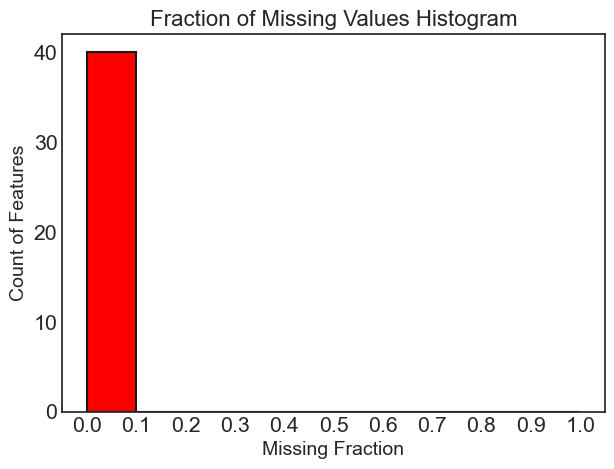

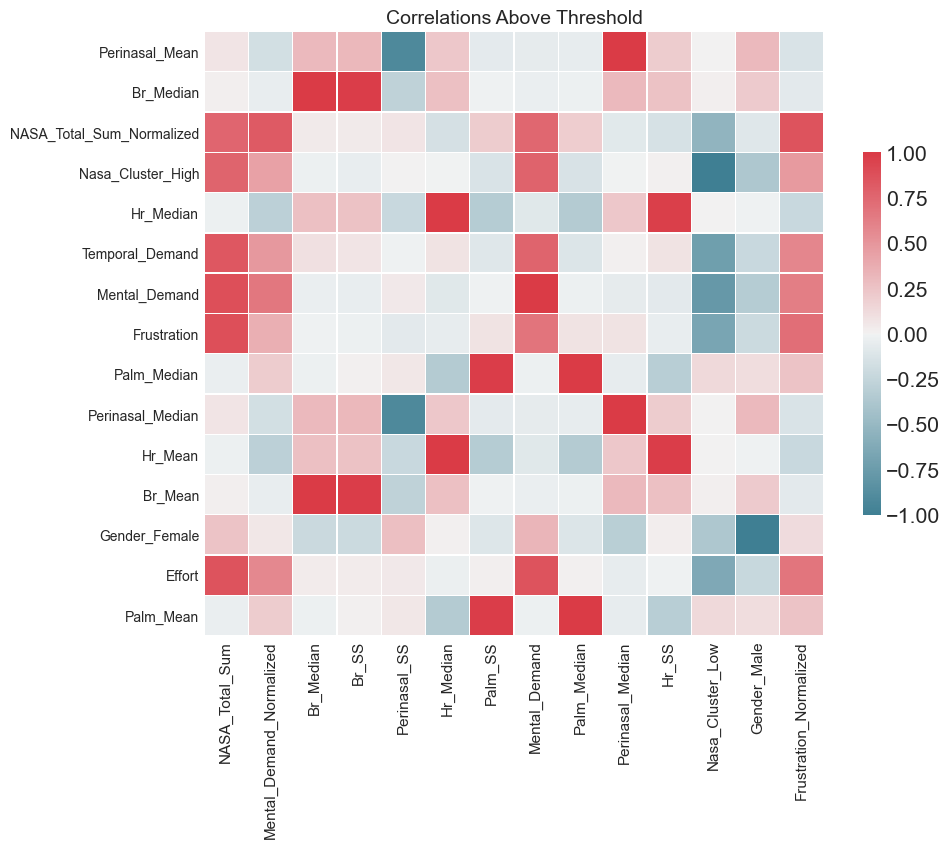

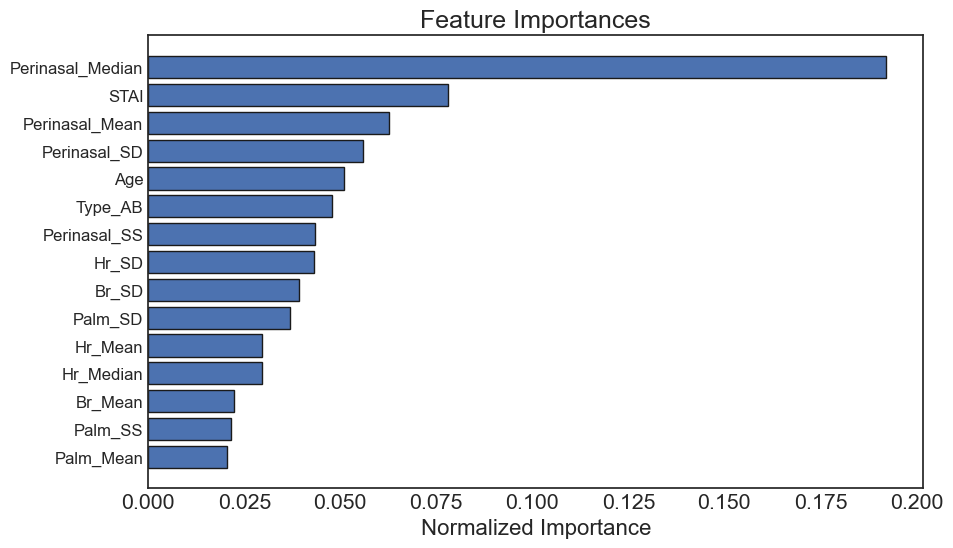

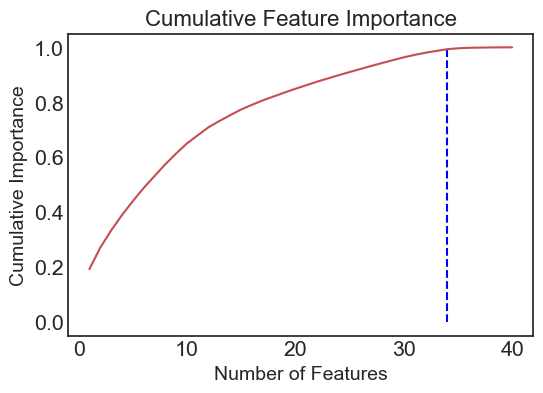

34 features required for 0.99 of cumulative importance
33 features required for cumulative importance of 0.99 after one hot encoding.
7 features do not contribute to cumulative importance of 0.99.

0 features with greater than 0.60 missing values.

0 features with a single unique value.

14 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.998769	valid_0's binary_logloss: 0.0475644
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[212]	valid_0's auc: 0.998236	valid_0's binary_logloss: 0.0406222
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.997455	valid_0's binary_logloss: 0.091946
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.998553	va

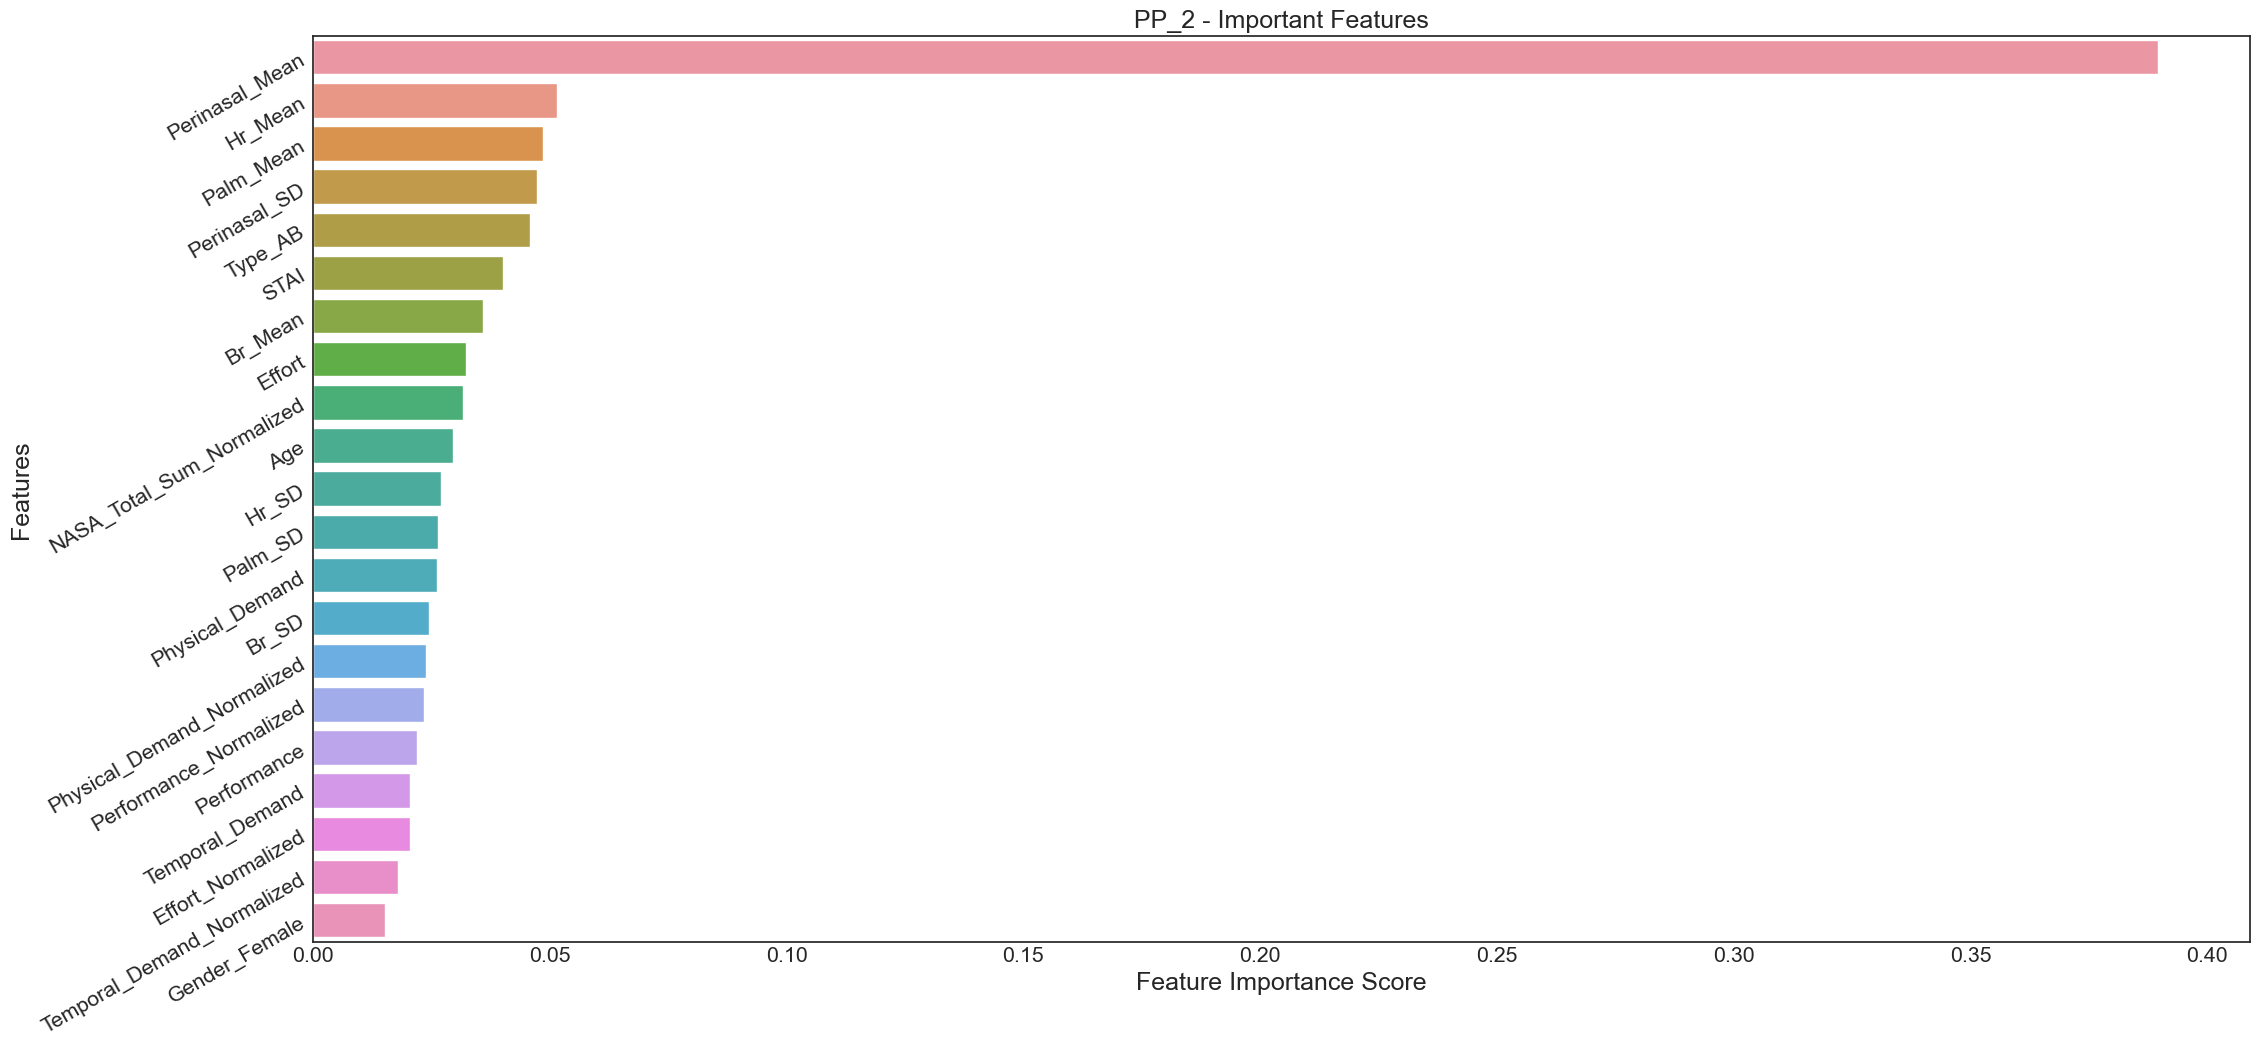











----------------------------------------------------
------------------------ HR ------------------------
----------------------------------------------------



Test Subjects -->
 [61, 29, 24, 38, 84, 2, 17]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          58.643998
stressed         41.356002

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          54.840849
stressed         45.159151


Total Train Rows: 4882    Percentage: 76.4%
Total Test Rows: 1508    Percentage: 23.6%


0 features with greater than 0.60 missing values.

15 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



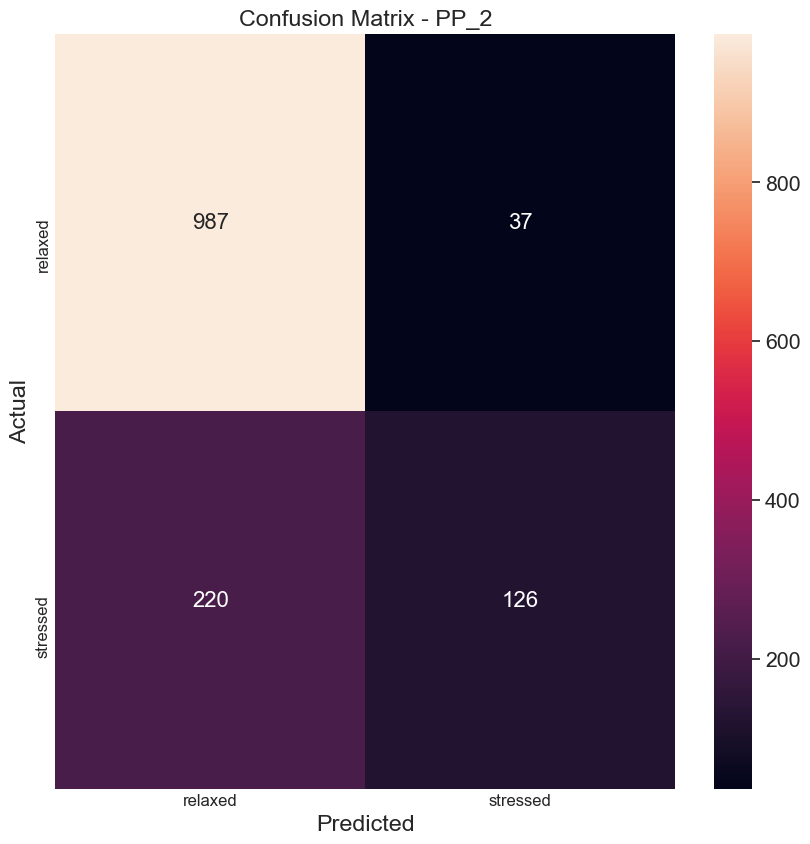

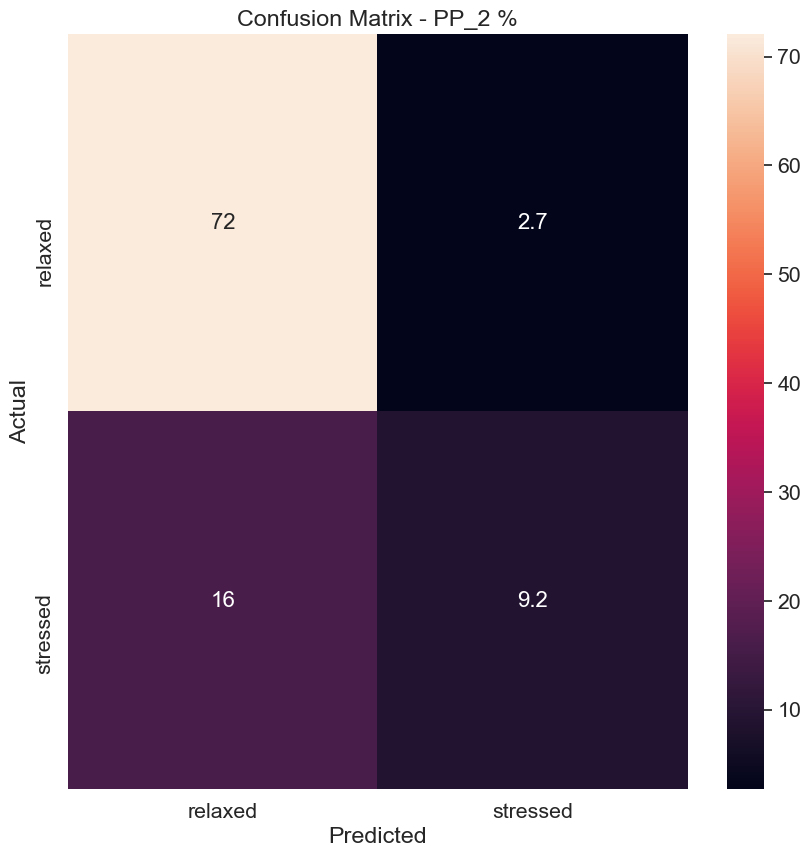

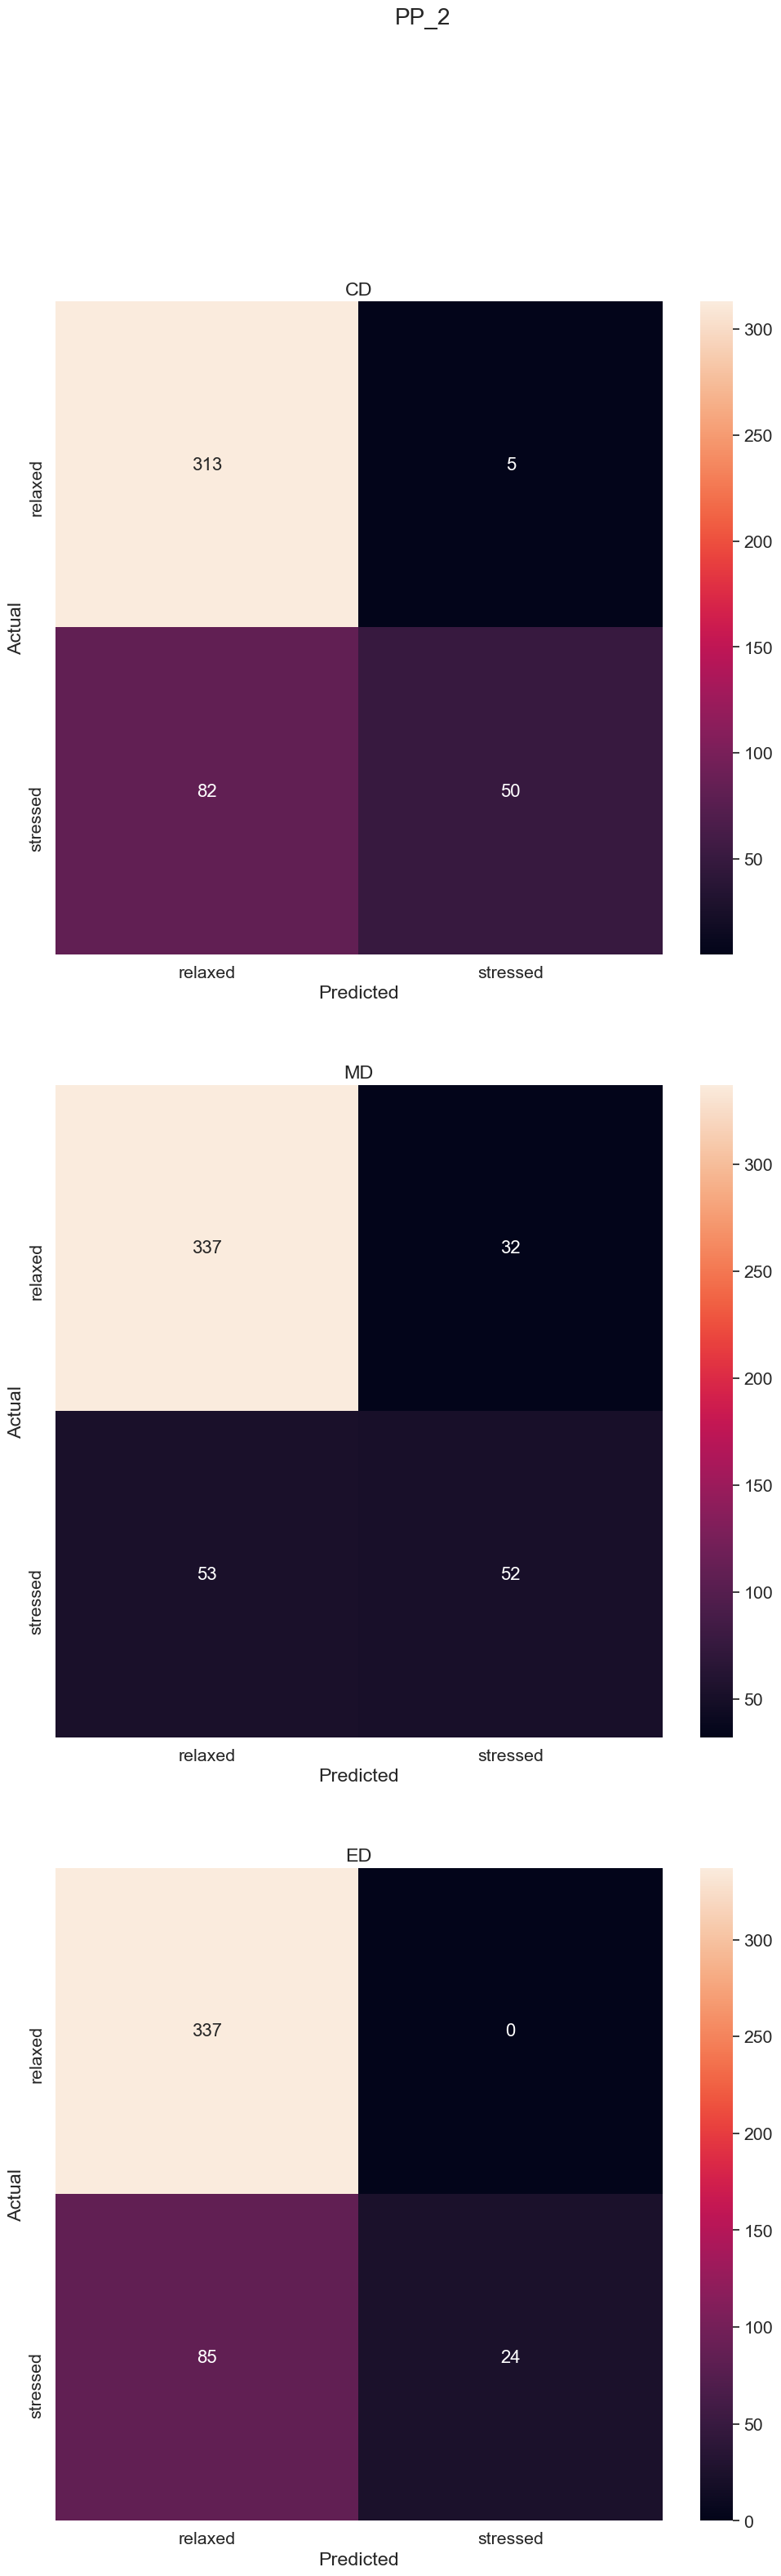

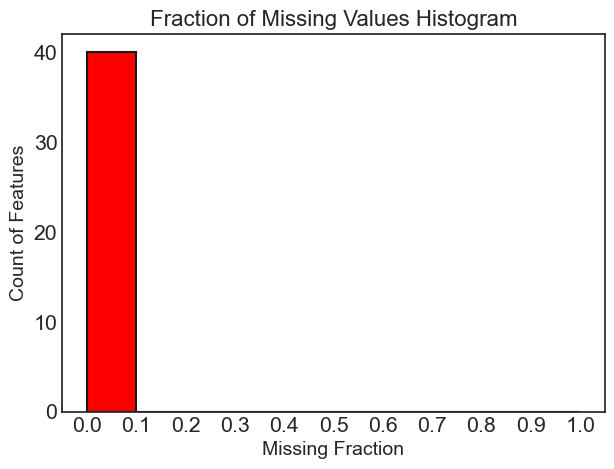

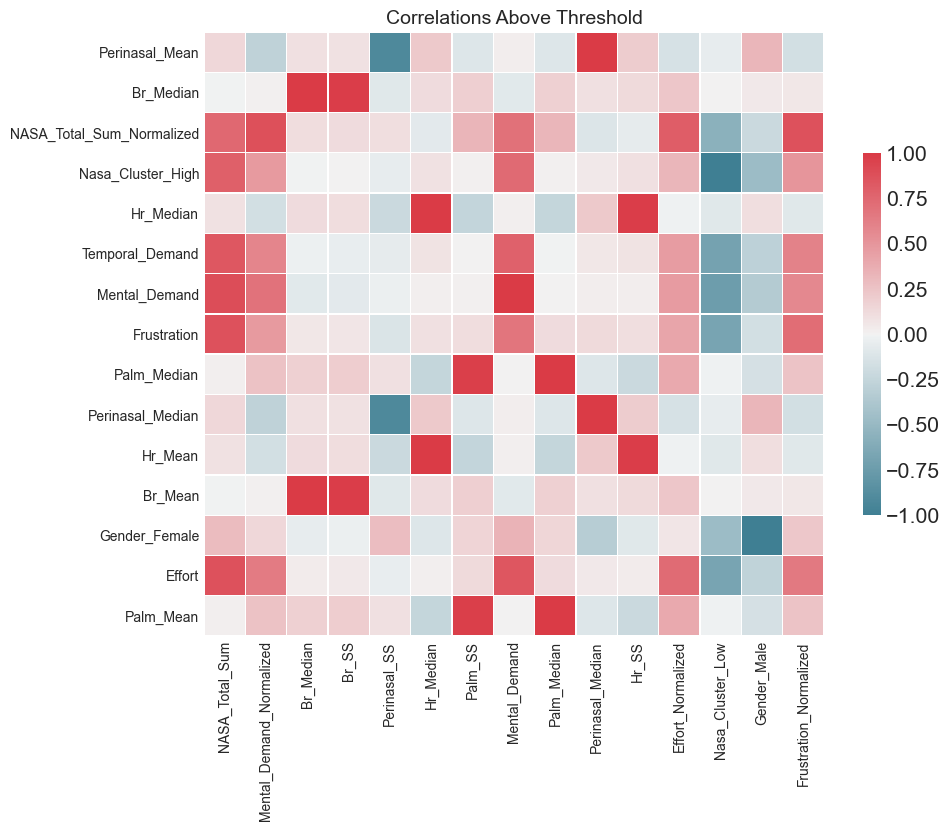

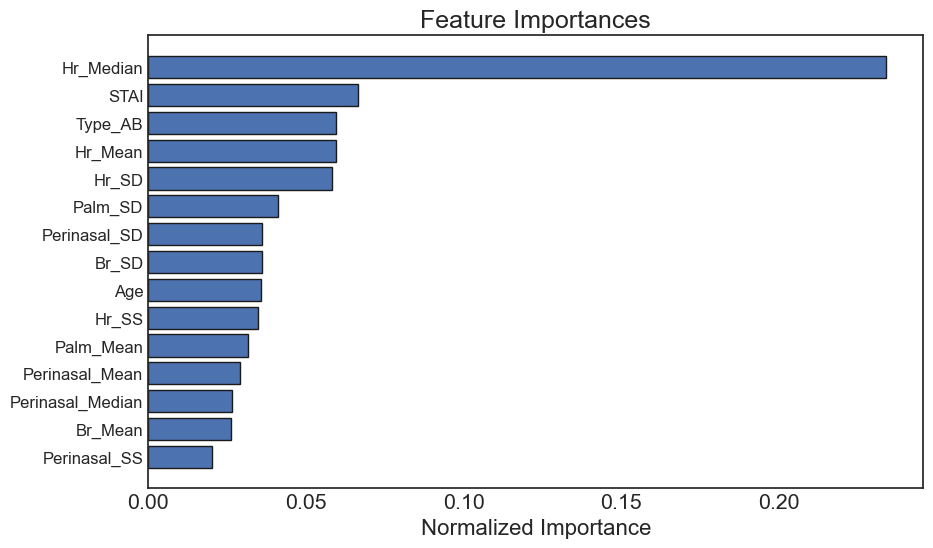

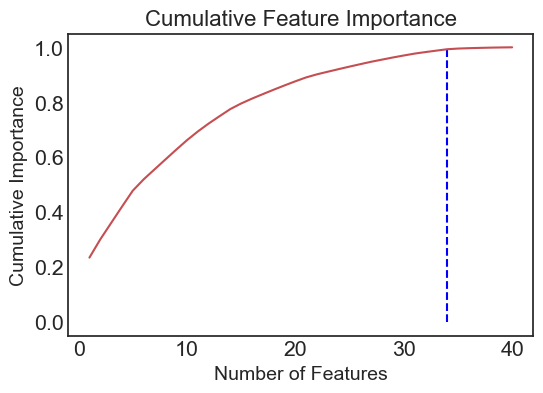

34 features required for 0.99 of cumulative importance
33 features required for cumulative importance of 0.99 after one hot encoding.
7 features do not contribute to cumulative importance of 0.99.

0 features with greater than 0.60 missing values.

0 features with a single unique value.

15 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.99944	valid_0's binary_logloss: 0.060367
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 0.995341	valid_0's binary_logloss: 0.0689835
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[208]	valid_0's auc: 0.996677	valid_0's binary_logloss: 0.0507491
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[147]	valid_0's auc: 0.998856	val

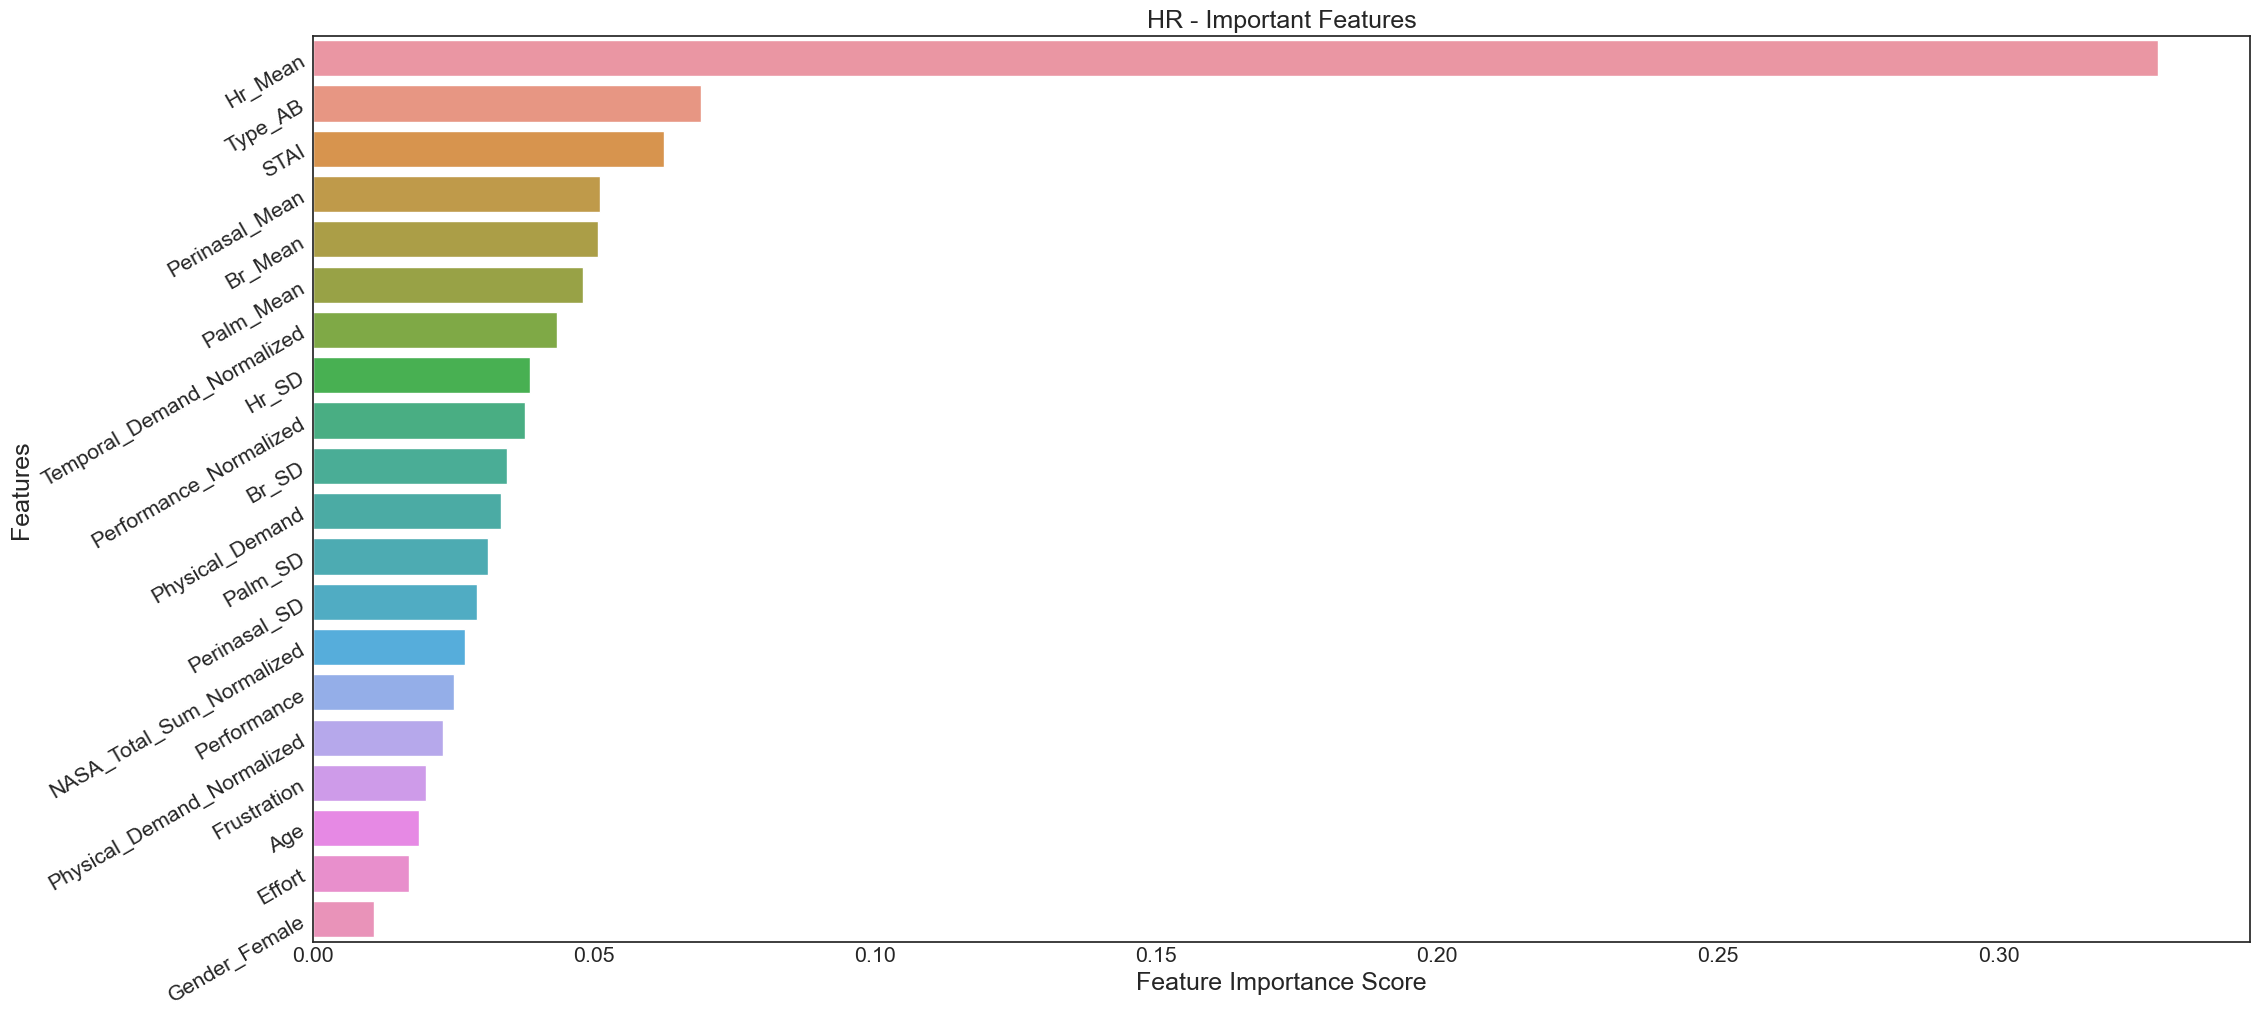











----------------------------------------------------
------------------------ BR ------------------------
----------------------------------------------------



Test Subjects -->
 [44, 62, 81, 20, 61, 38, 79]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          55.845151
stressed         44.154849

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          48.976109
stressed         51.023891


Total Train Rows: 5218    Percentage: 81.66%
Total Test Rows: 1172    Percentage: 18.34%


0 features with greater than 0.60 missing values.

16 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



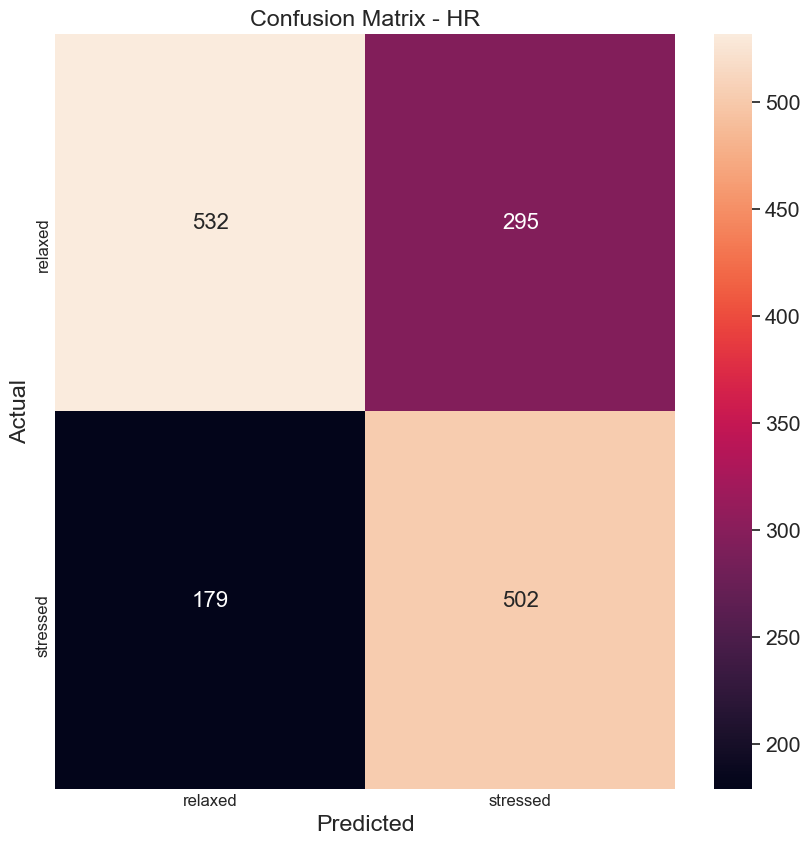

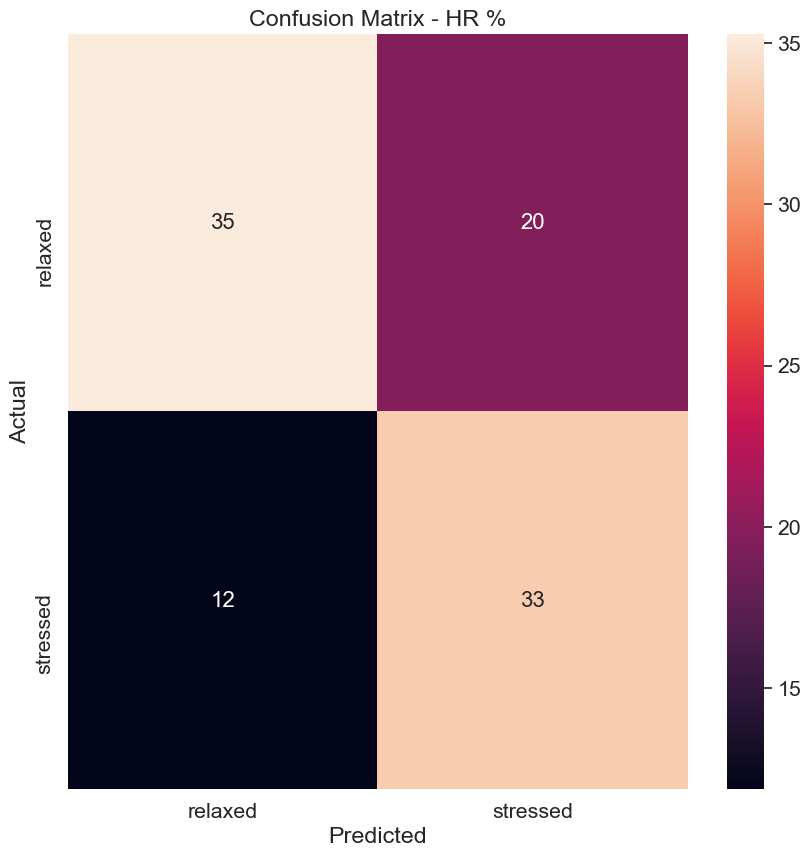

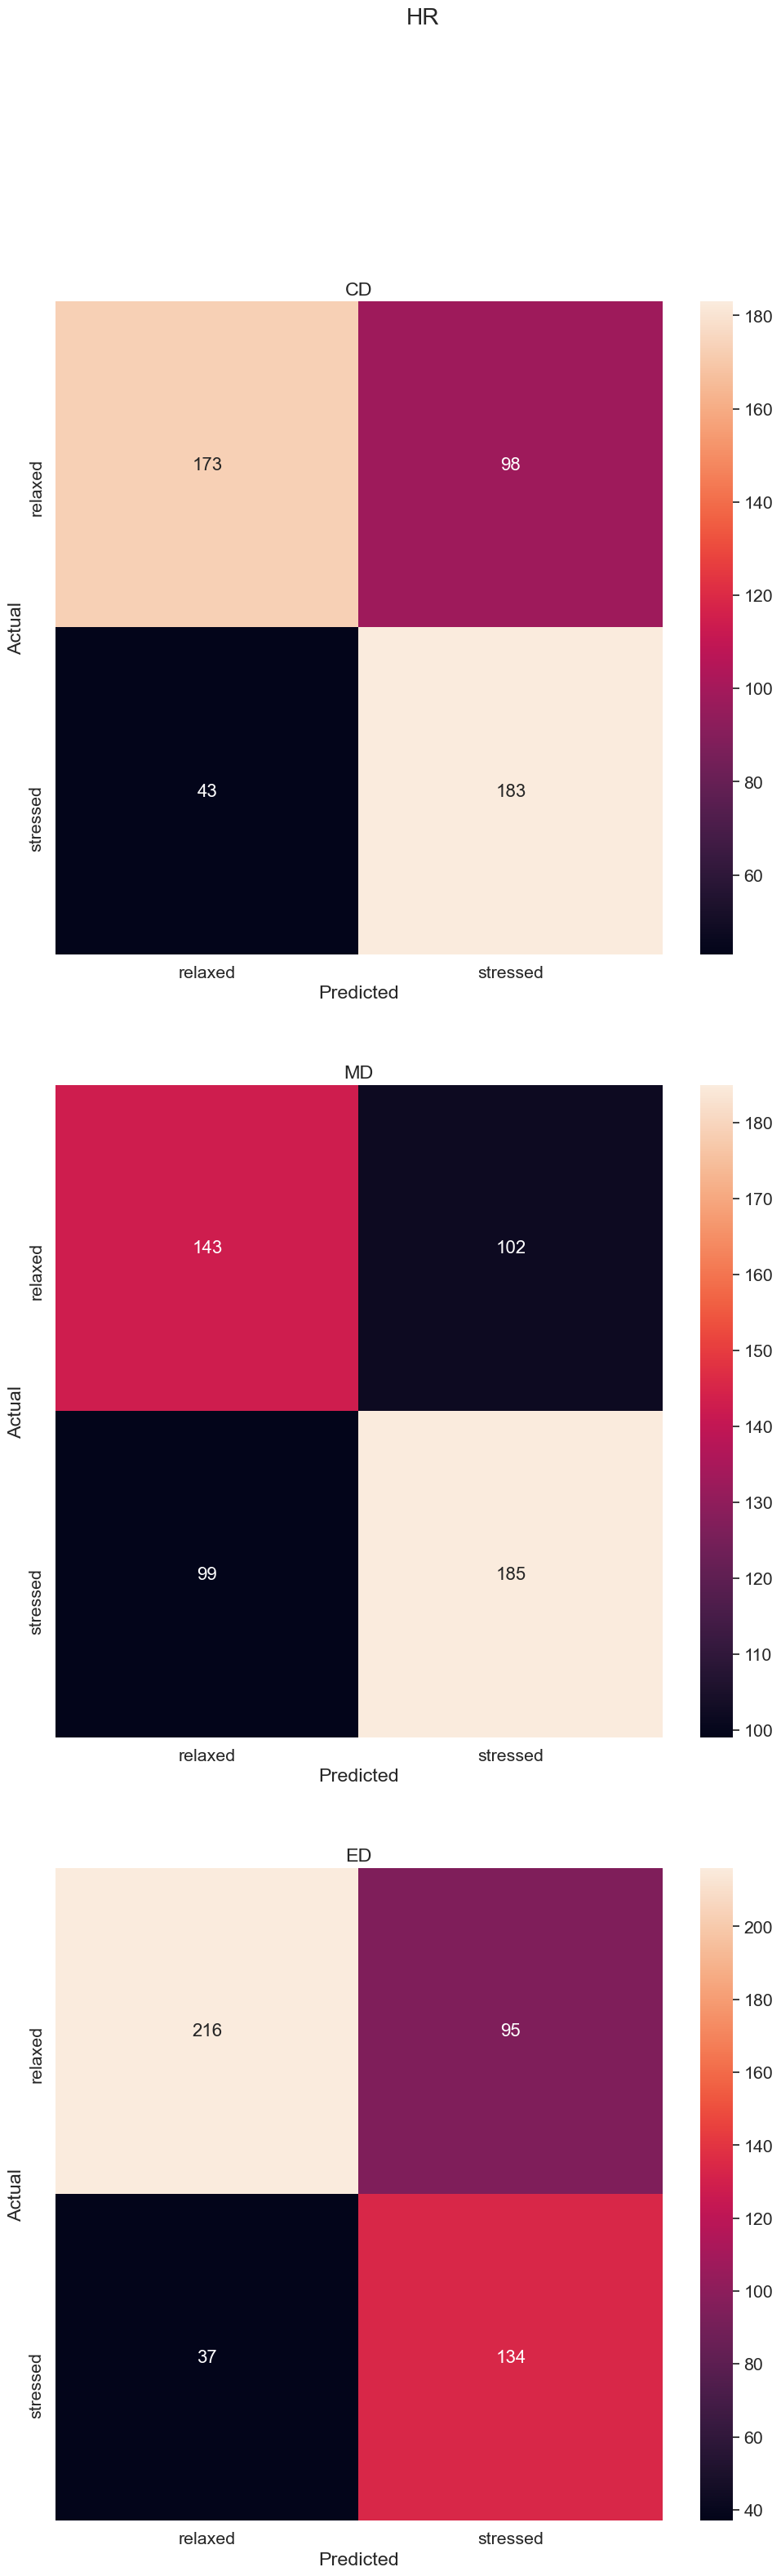

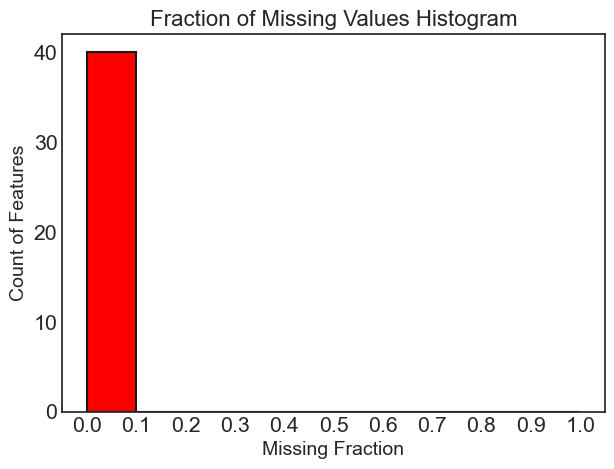

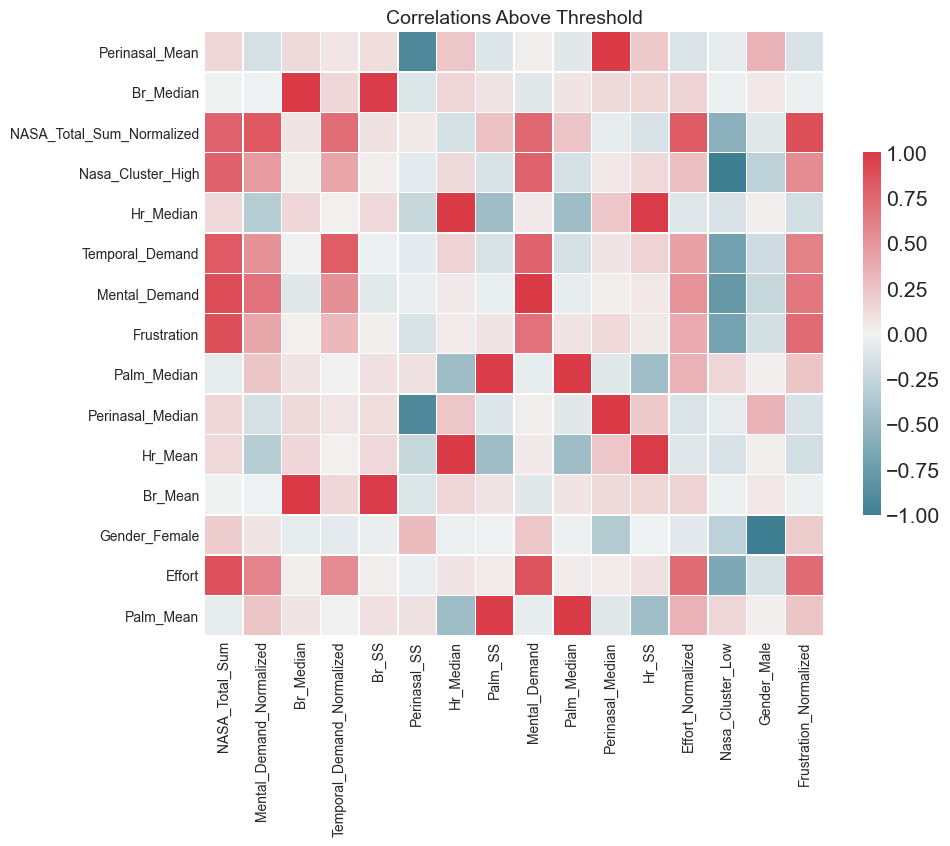

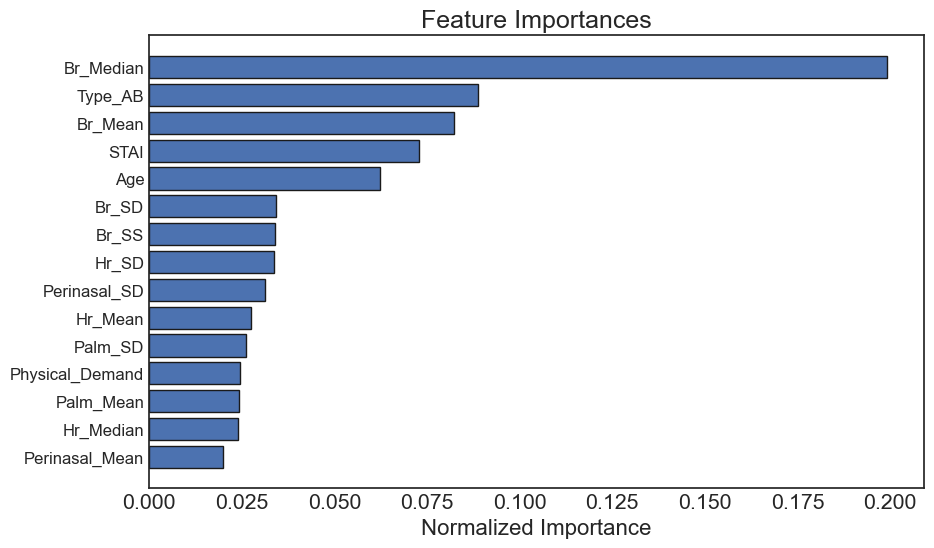

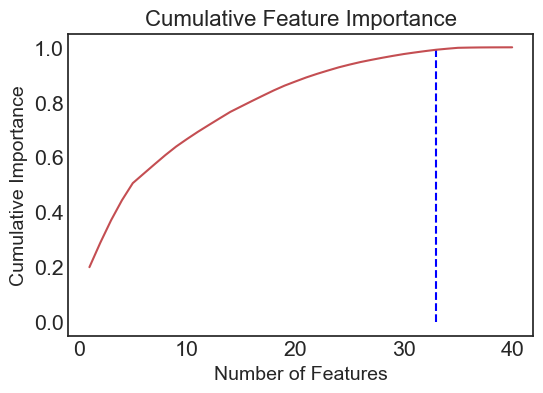

33 features required for 0.99 of cumulative importance
32 features required for cumulative importance of 0.99 after one hot encoding.
8 features do not contribute to cumulative importance of 0.99.

0 features with greater than 0.60 missing values.

0 features with a single unique value.

16 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[197]	valid_0's auc: 0.999458	valid_0's binary_logloss: 0.0220868
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[213]	valid_0's auc: 0.999901	valid_0's binary_logloss: 0.0163732
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.999888	valid_0's binary_logloss: 0.0400043
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.999355	v

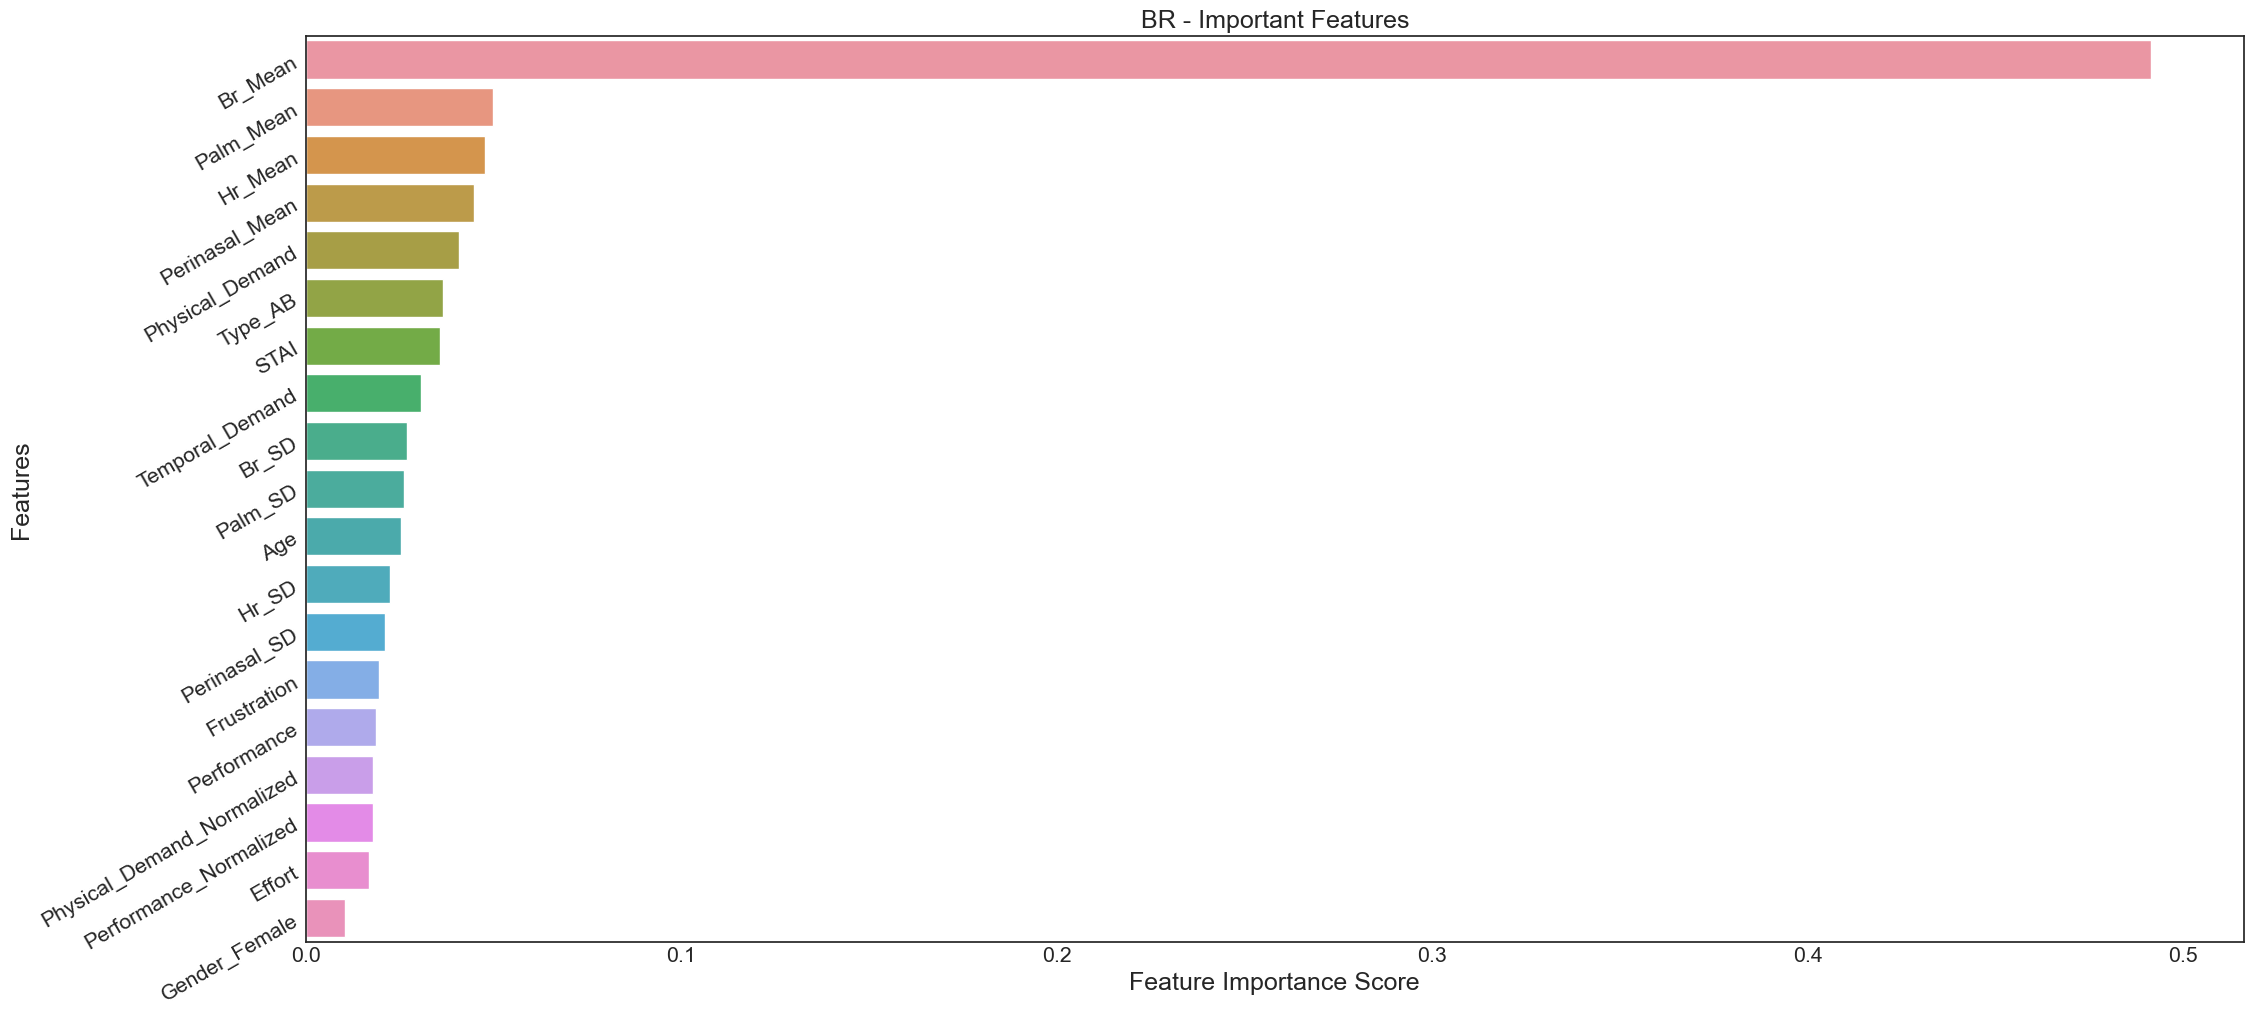











----------------------------------------------------
------------------------ PP_HR_BR ------------------------
----------------------------------------------------



Test Subjects -->
 [31, 66, 16, 29, 62, 44, 36]


Total Train Subjects: 24    Percentage: 77.42%
Total Test Subjects: 7    Percentage: 22.58%


Train Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          66.385711
stressed         33.614289

Test Data Percentage -->
              Arousal_Mode
Arousal_Mode              
relaxed          69.651741
stressed         30.348259


Total Train Rows: 4983    Percentage: 77.98%
Total Test Rows: 1407    Percentage: 22.02%


0 features with greater than 0.60 missing values.

15 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



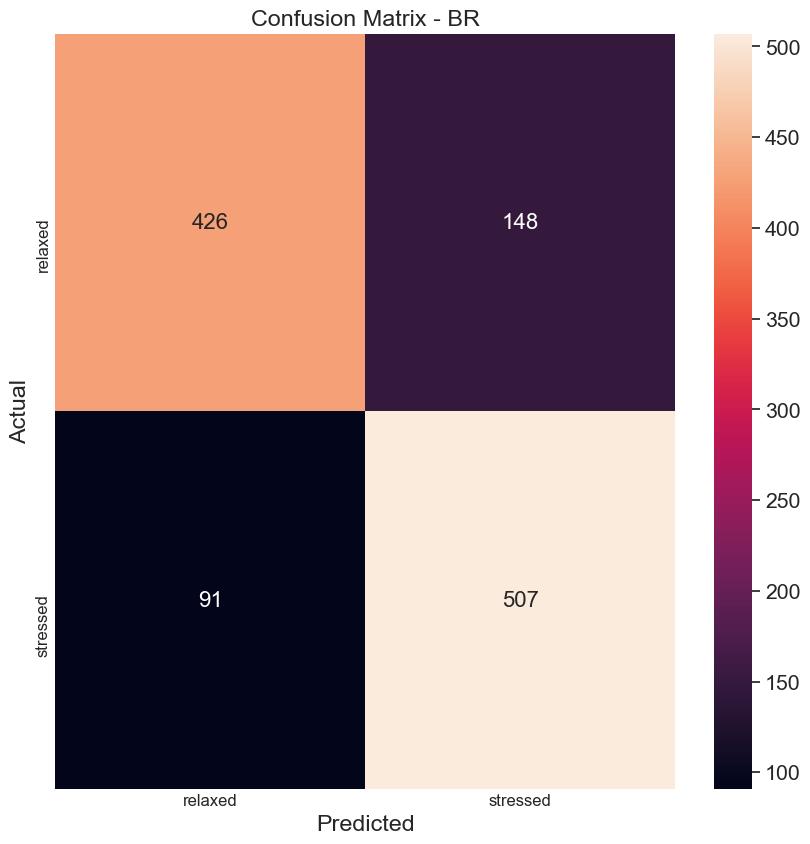

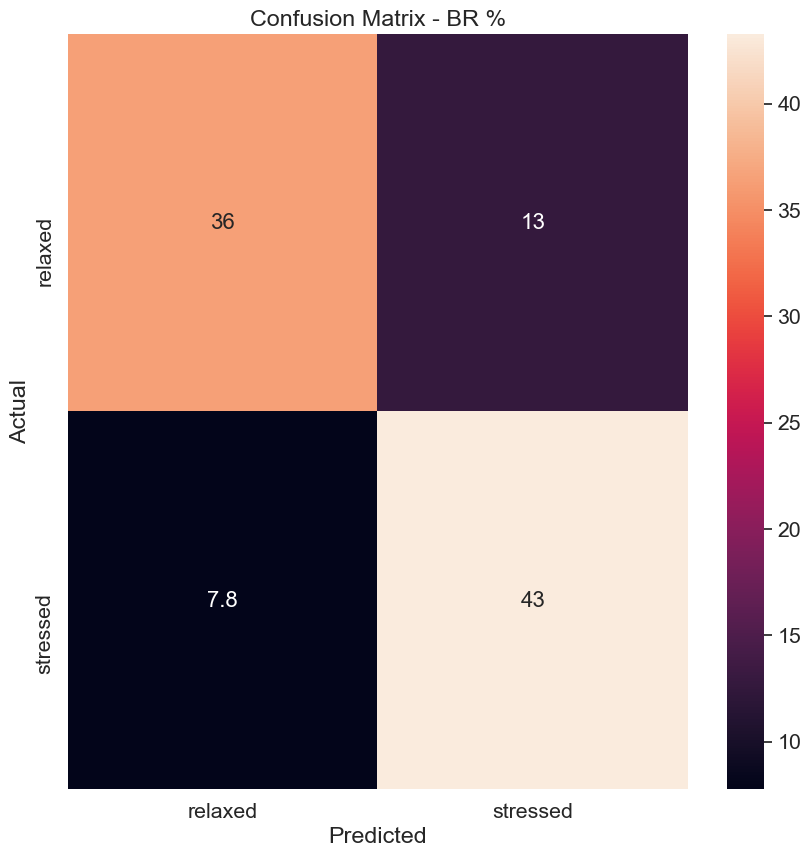

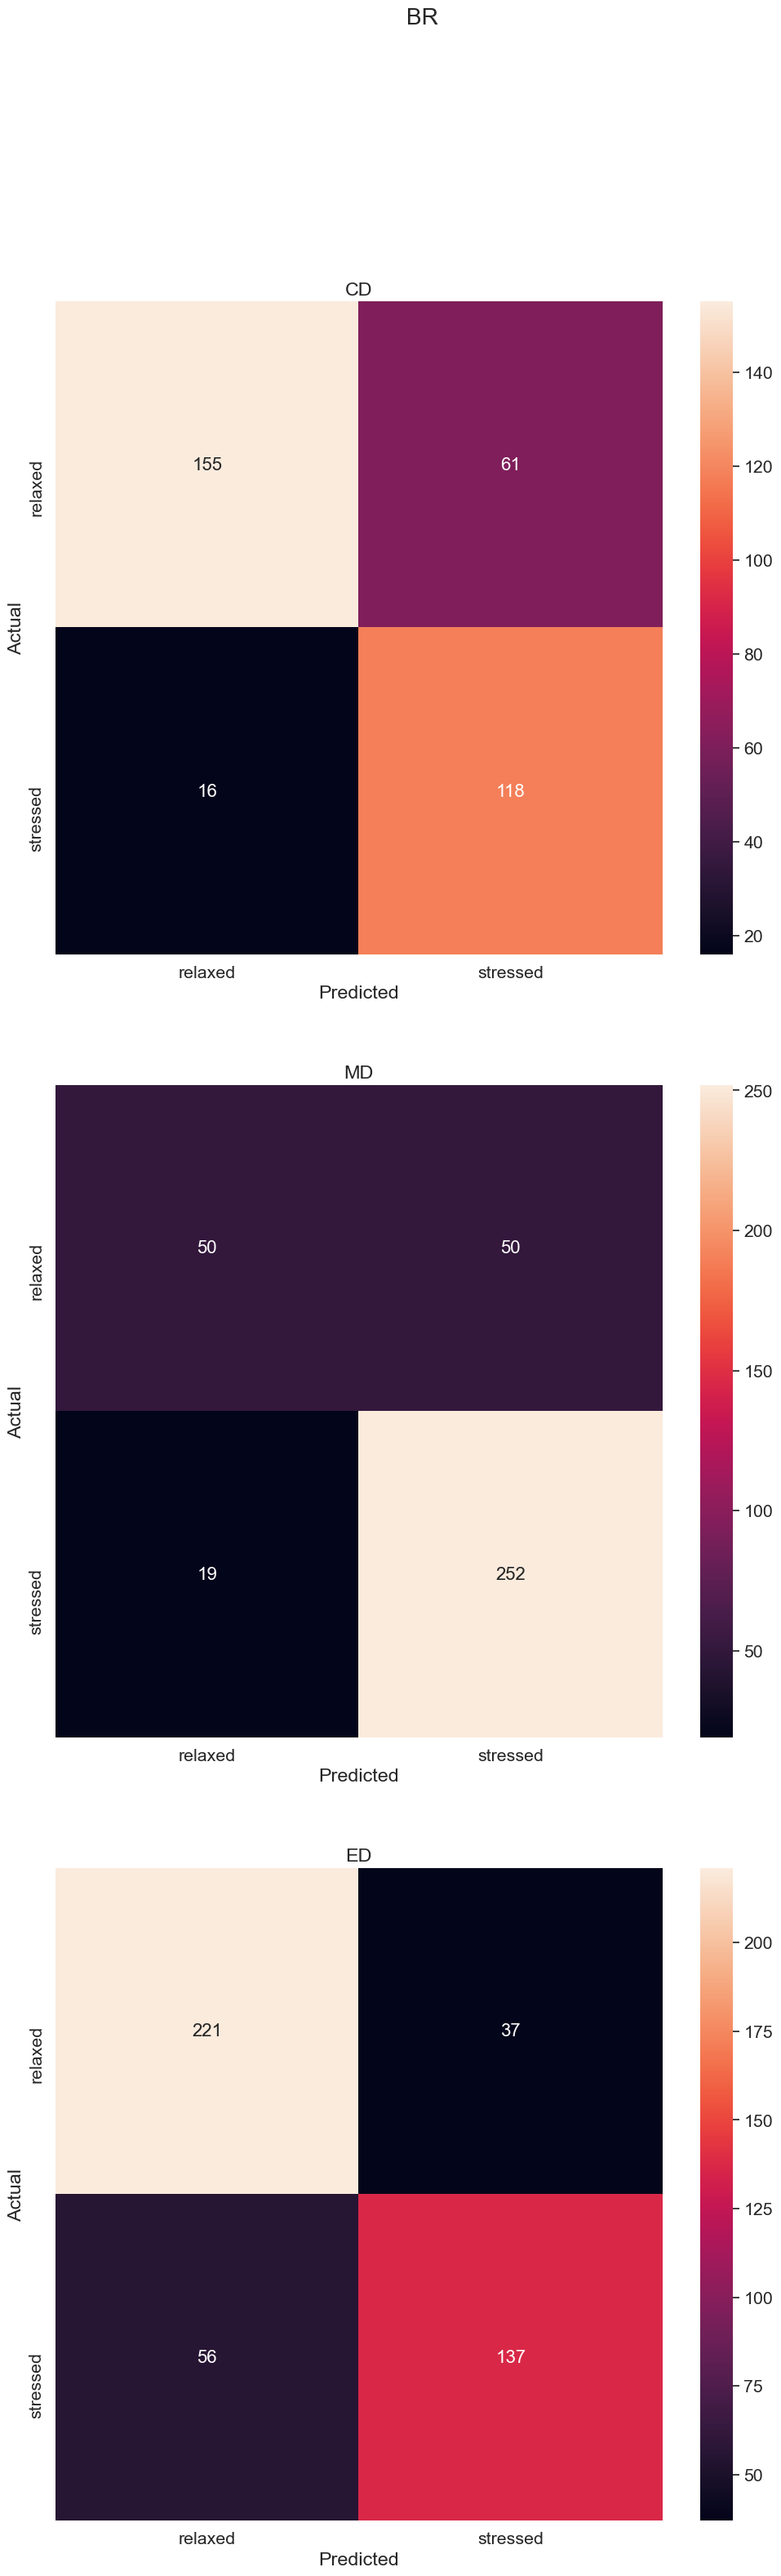

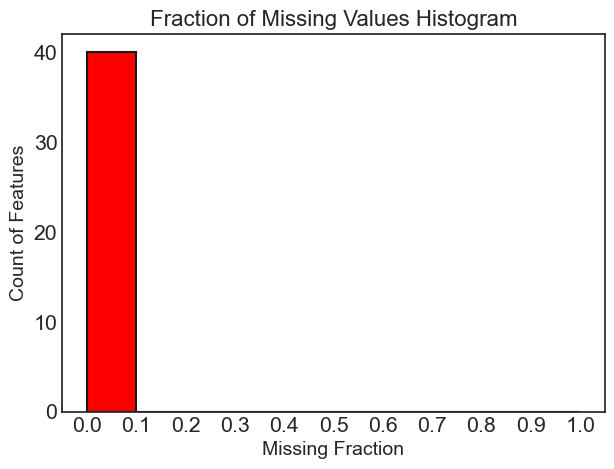

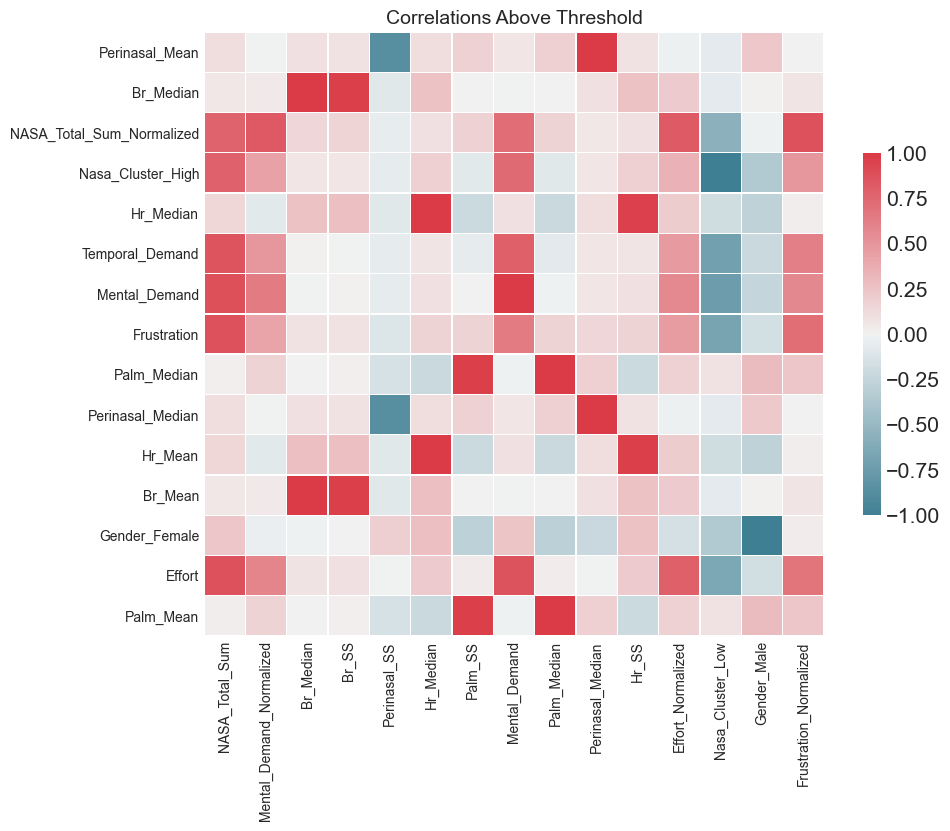

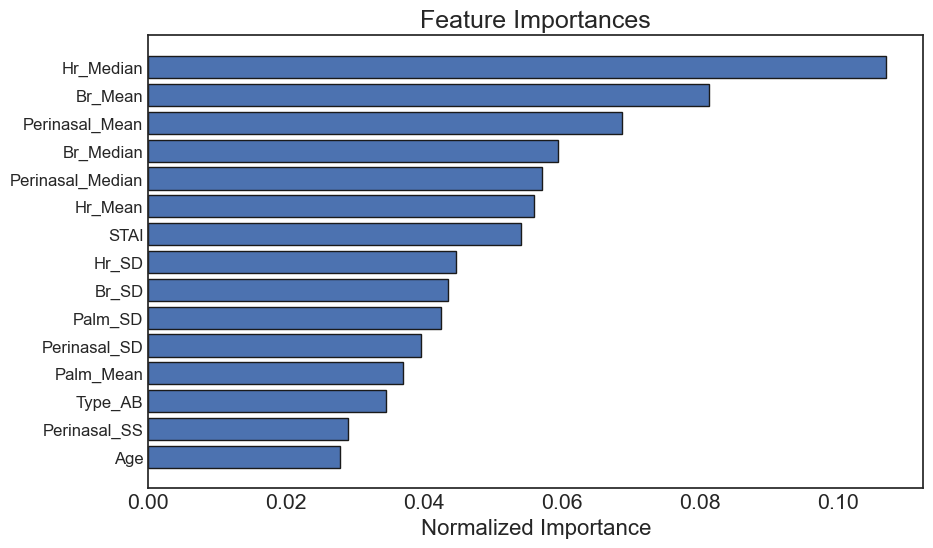

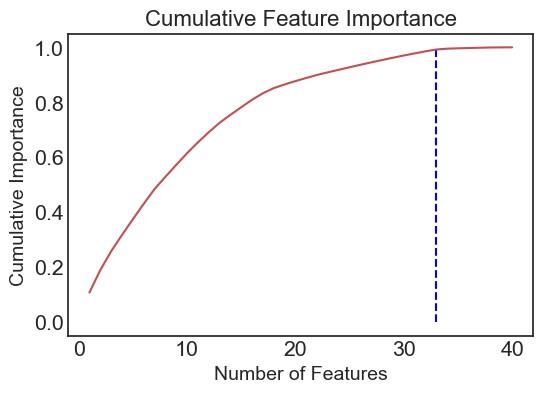

33 features required for 0.99 of cumulative importance
32 features required for cumulative importance of 0.99 after one hot encoding.
8 features do not contribute to cumulative importance of 0.99.

0 features with greater than 0.60 missing values.

0 features with a single unique value.

15 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[411]	valid_0's auc: 0.99087	valid_0's binary_logloss: 0.113752
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[427]	valid_0's auc: 0.995206	valid_0's binary_logloss: 0.0860959
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[283]	valid_0's auc: 0.990661	valid_0's binary_logloss: 0.11505
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[352]	valid_0's auc: 0.989523	vali

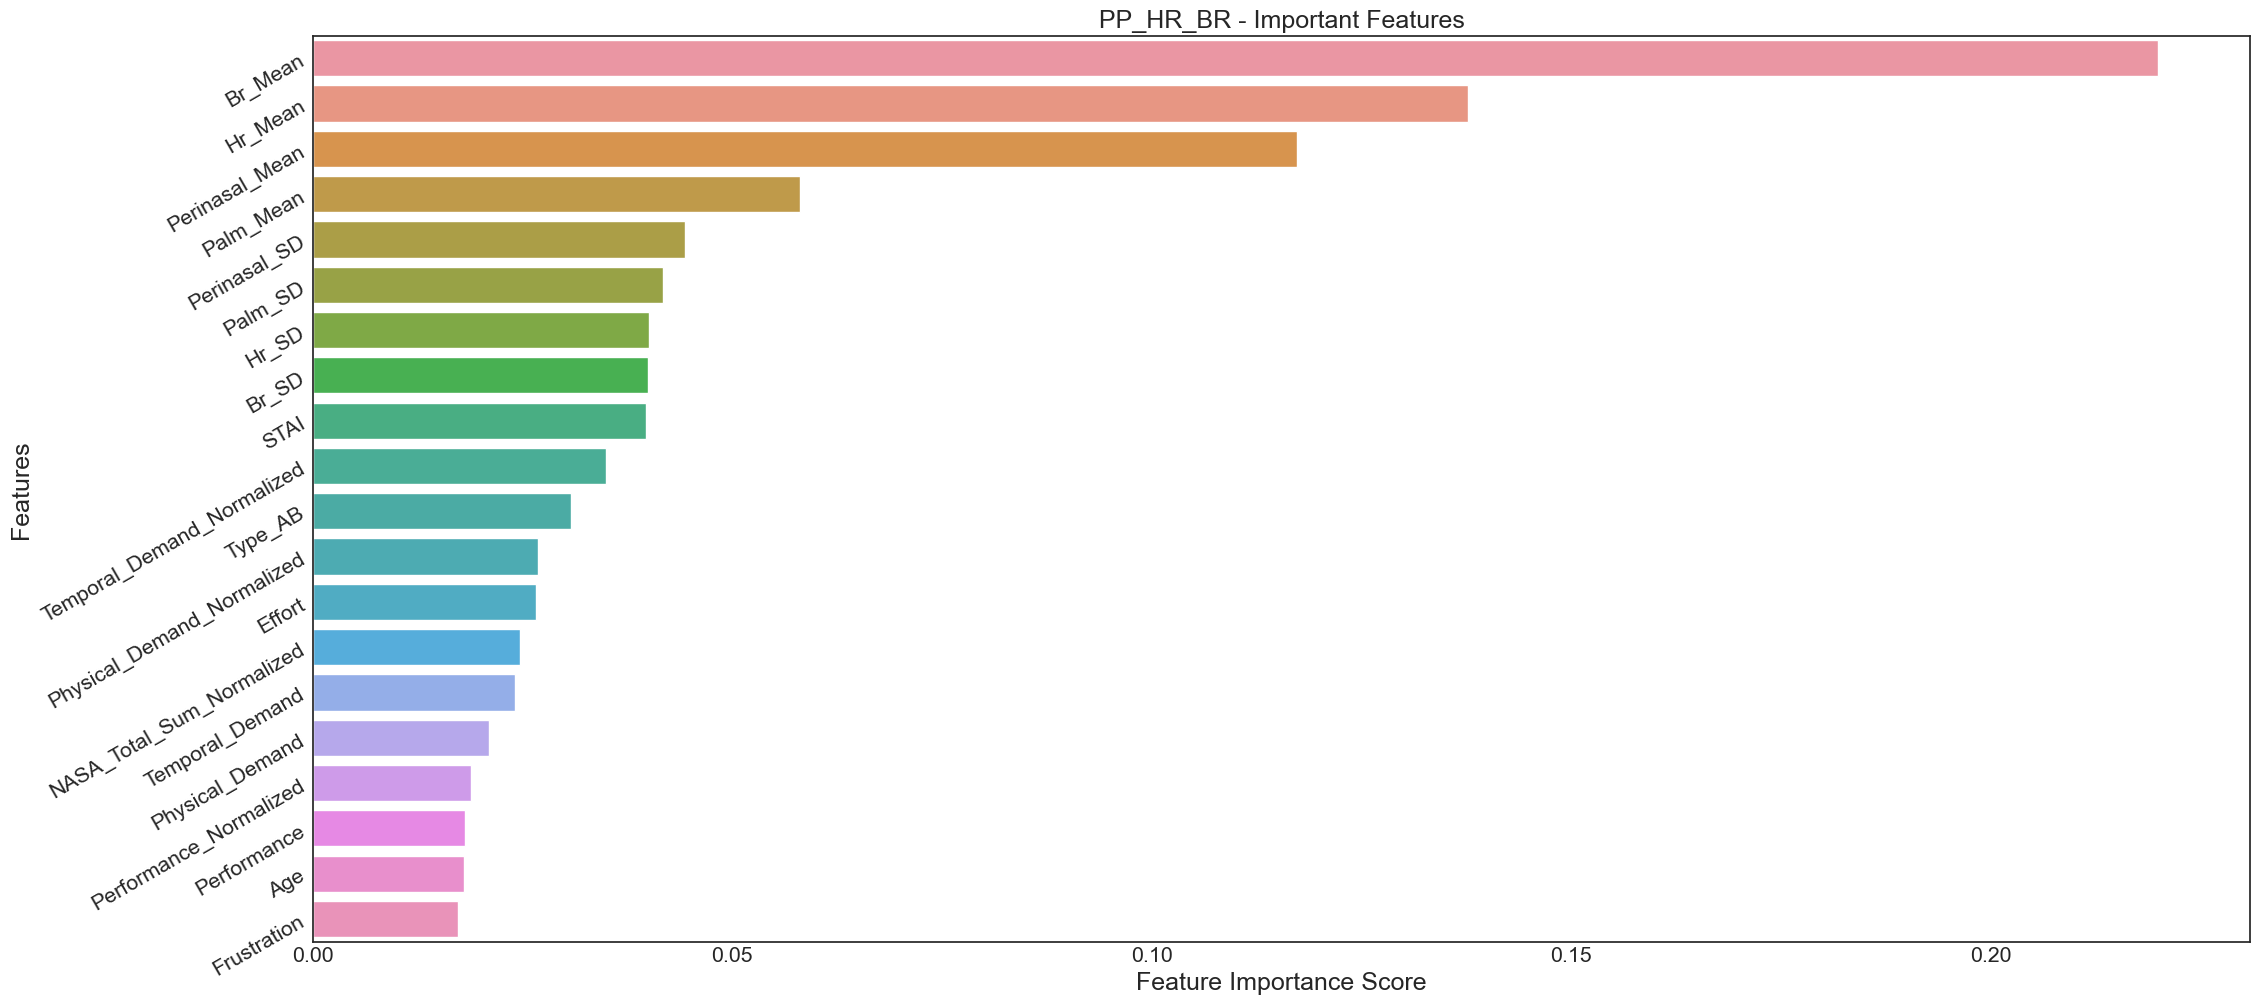

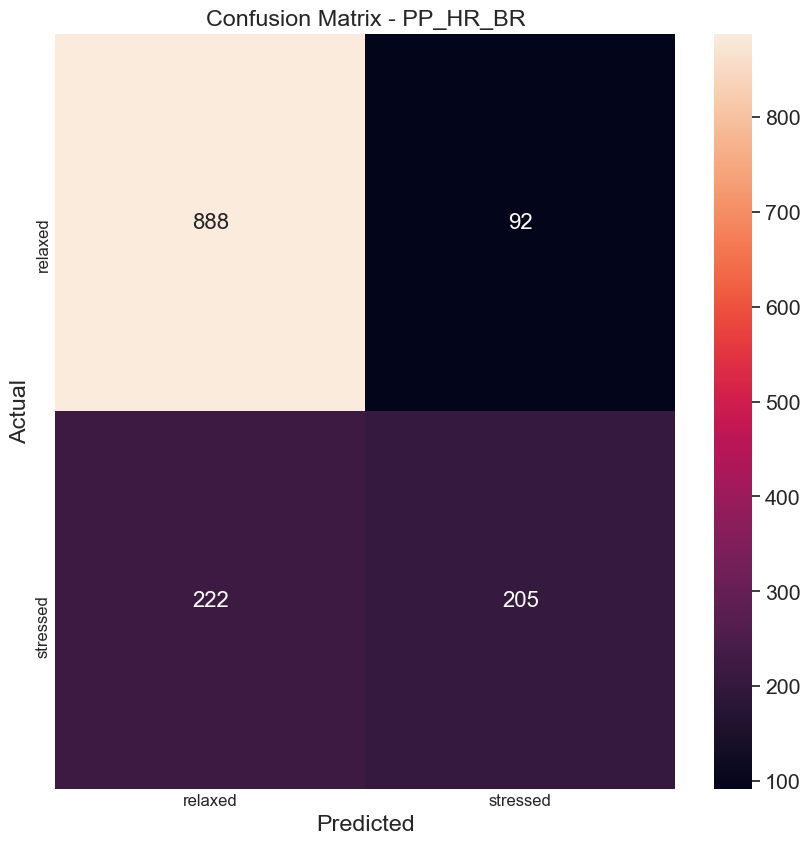

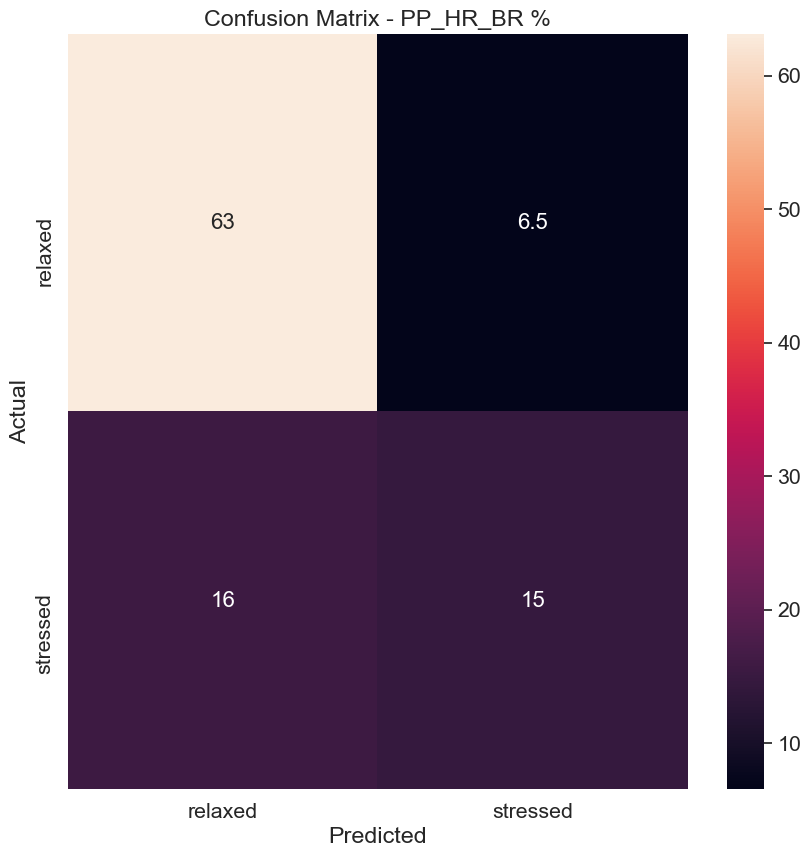

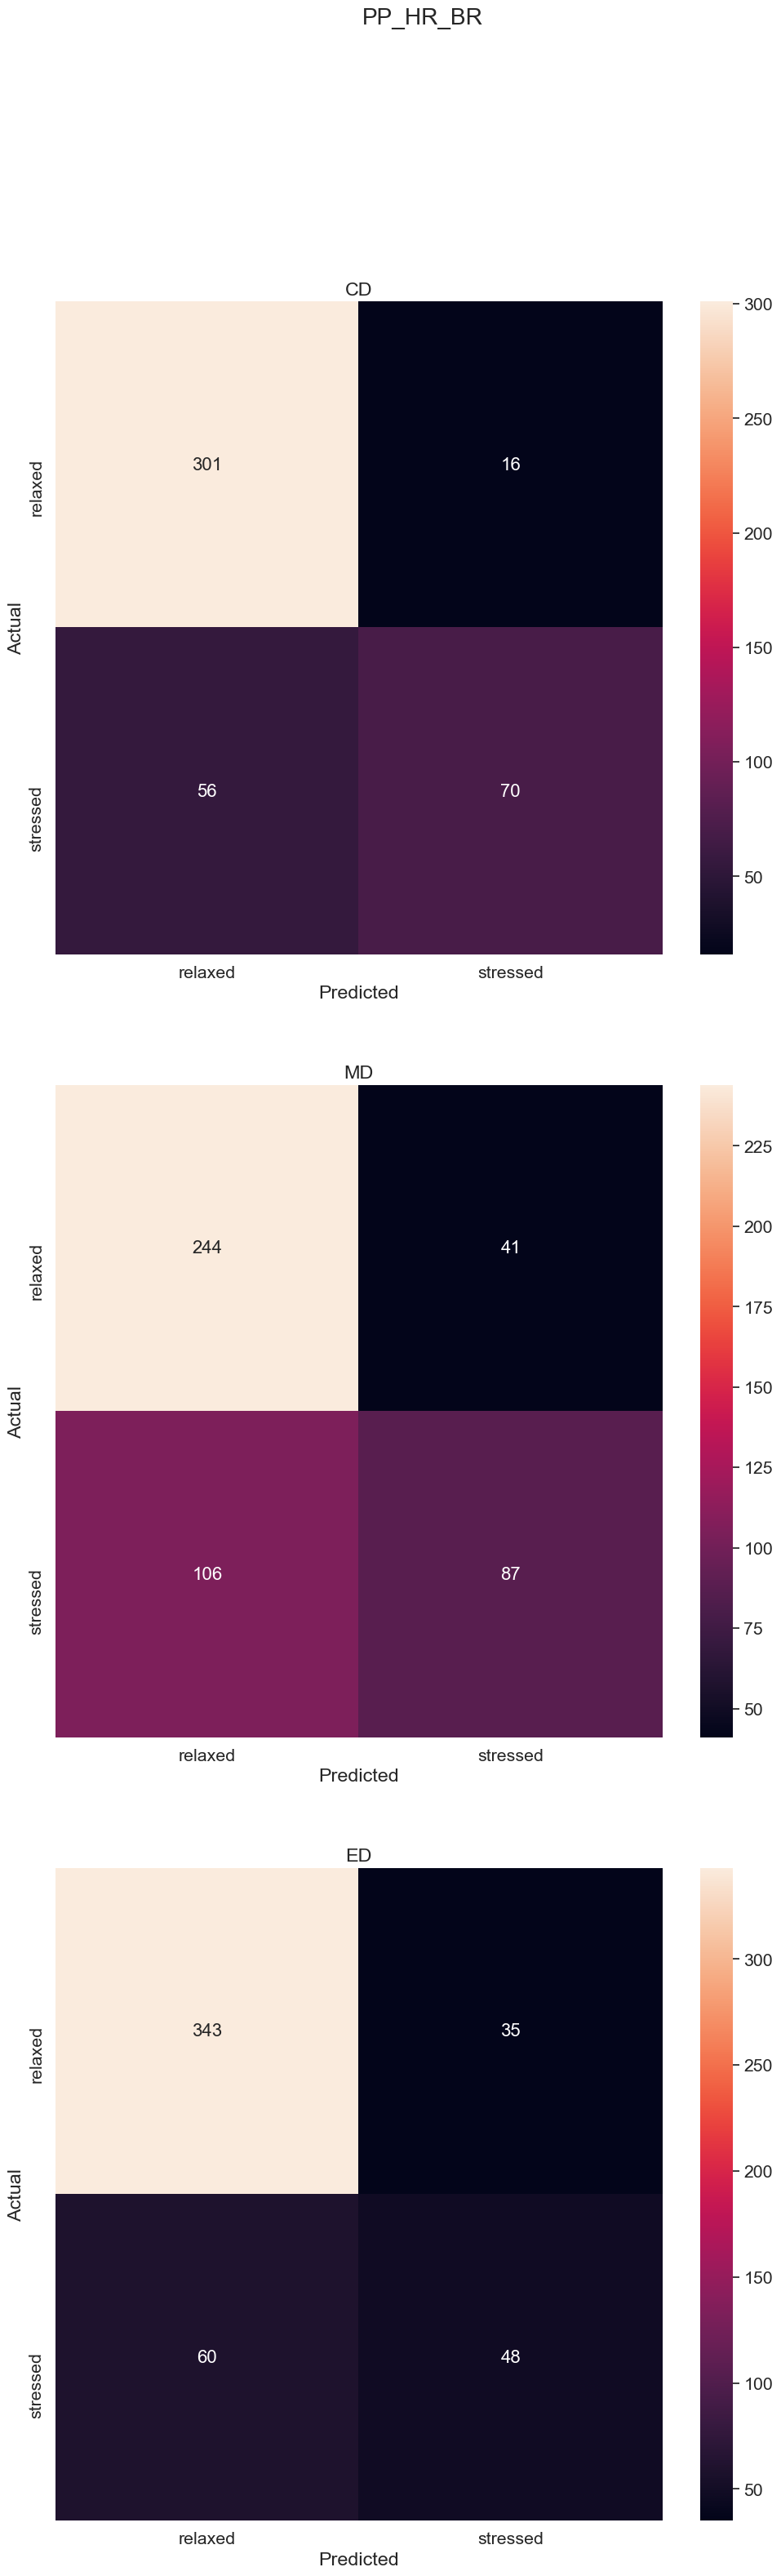

In [36]:
#####################################################################################
# arousal_signals = ['PP']
arousal_signals = ['PP', 'PP_2', 'HR', 'BR', 'PP_HR_BR']

# 'PP', 'PP_2', 'HR', 'BR'
# 'PP_HR', 'HR_BR', 'PP_BR', 'PP_HR_BR'
#####################################################################################



for arousal_signal in arousal_signals:
    print('----------------------------------------------------')
    print('------------------------', arousal_signal, '------------------------')
    print('----------------------------------------------------\n')
        
    for i in range(1):
        # print('\n--------------------------------------------- Iteration: ', i+1)
        get_bootstrap_results(final_df, feature_list, arousal_signal, random_selection = False)
        
    print('\n\n\n\n\n\n\n\n\n')

# 

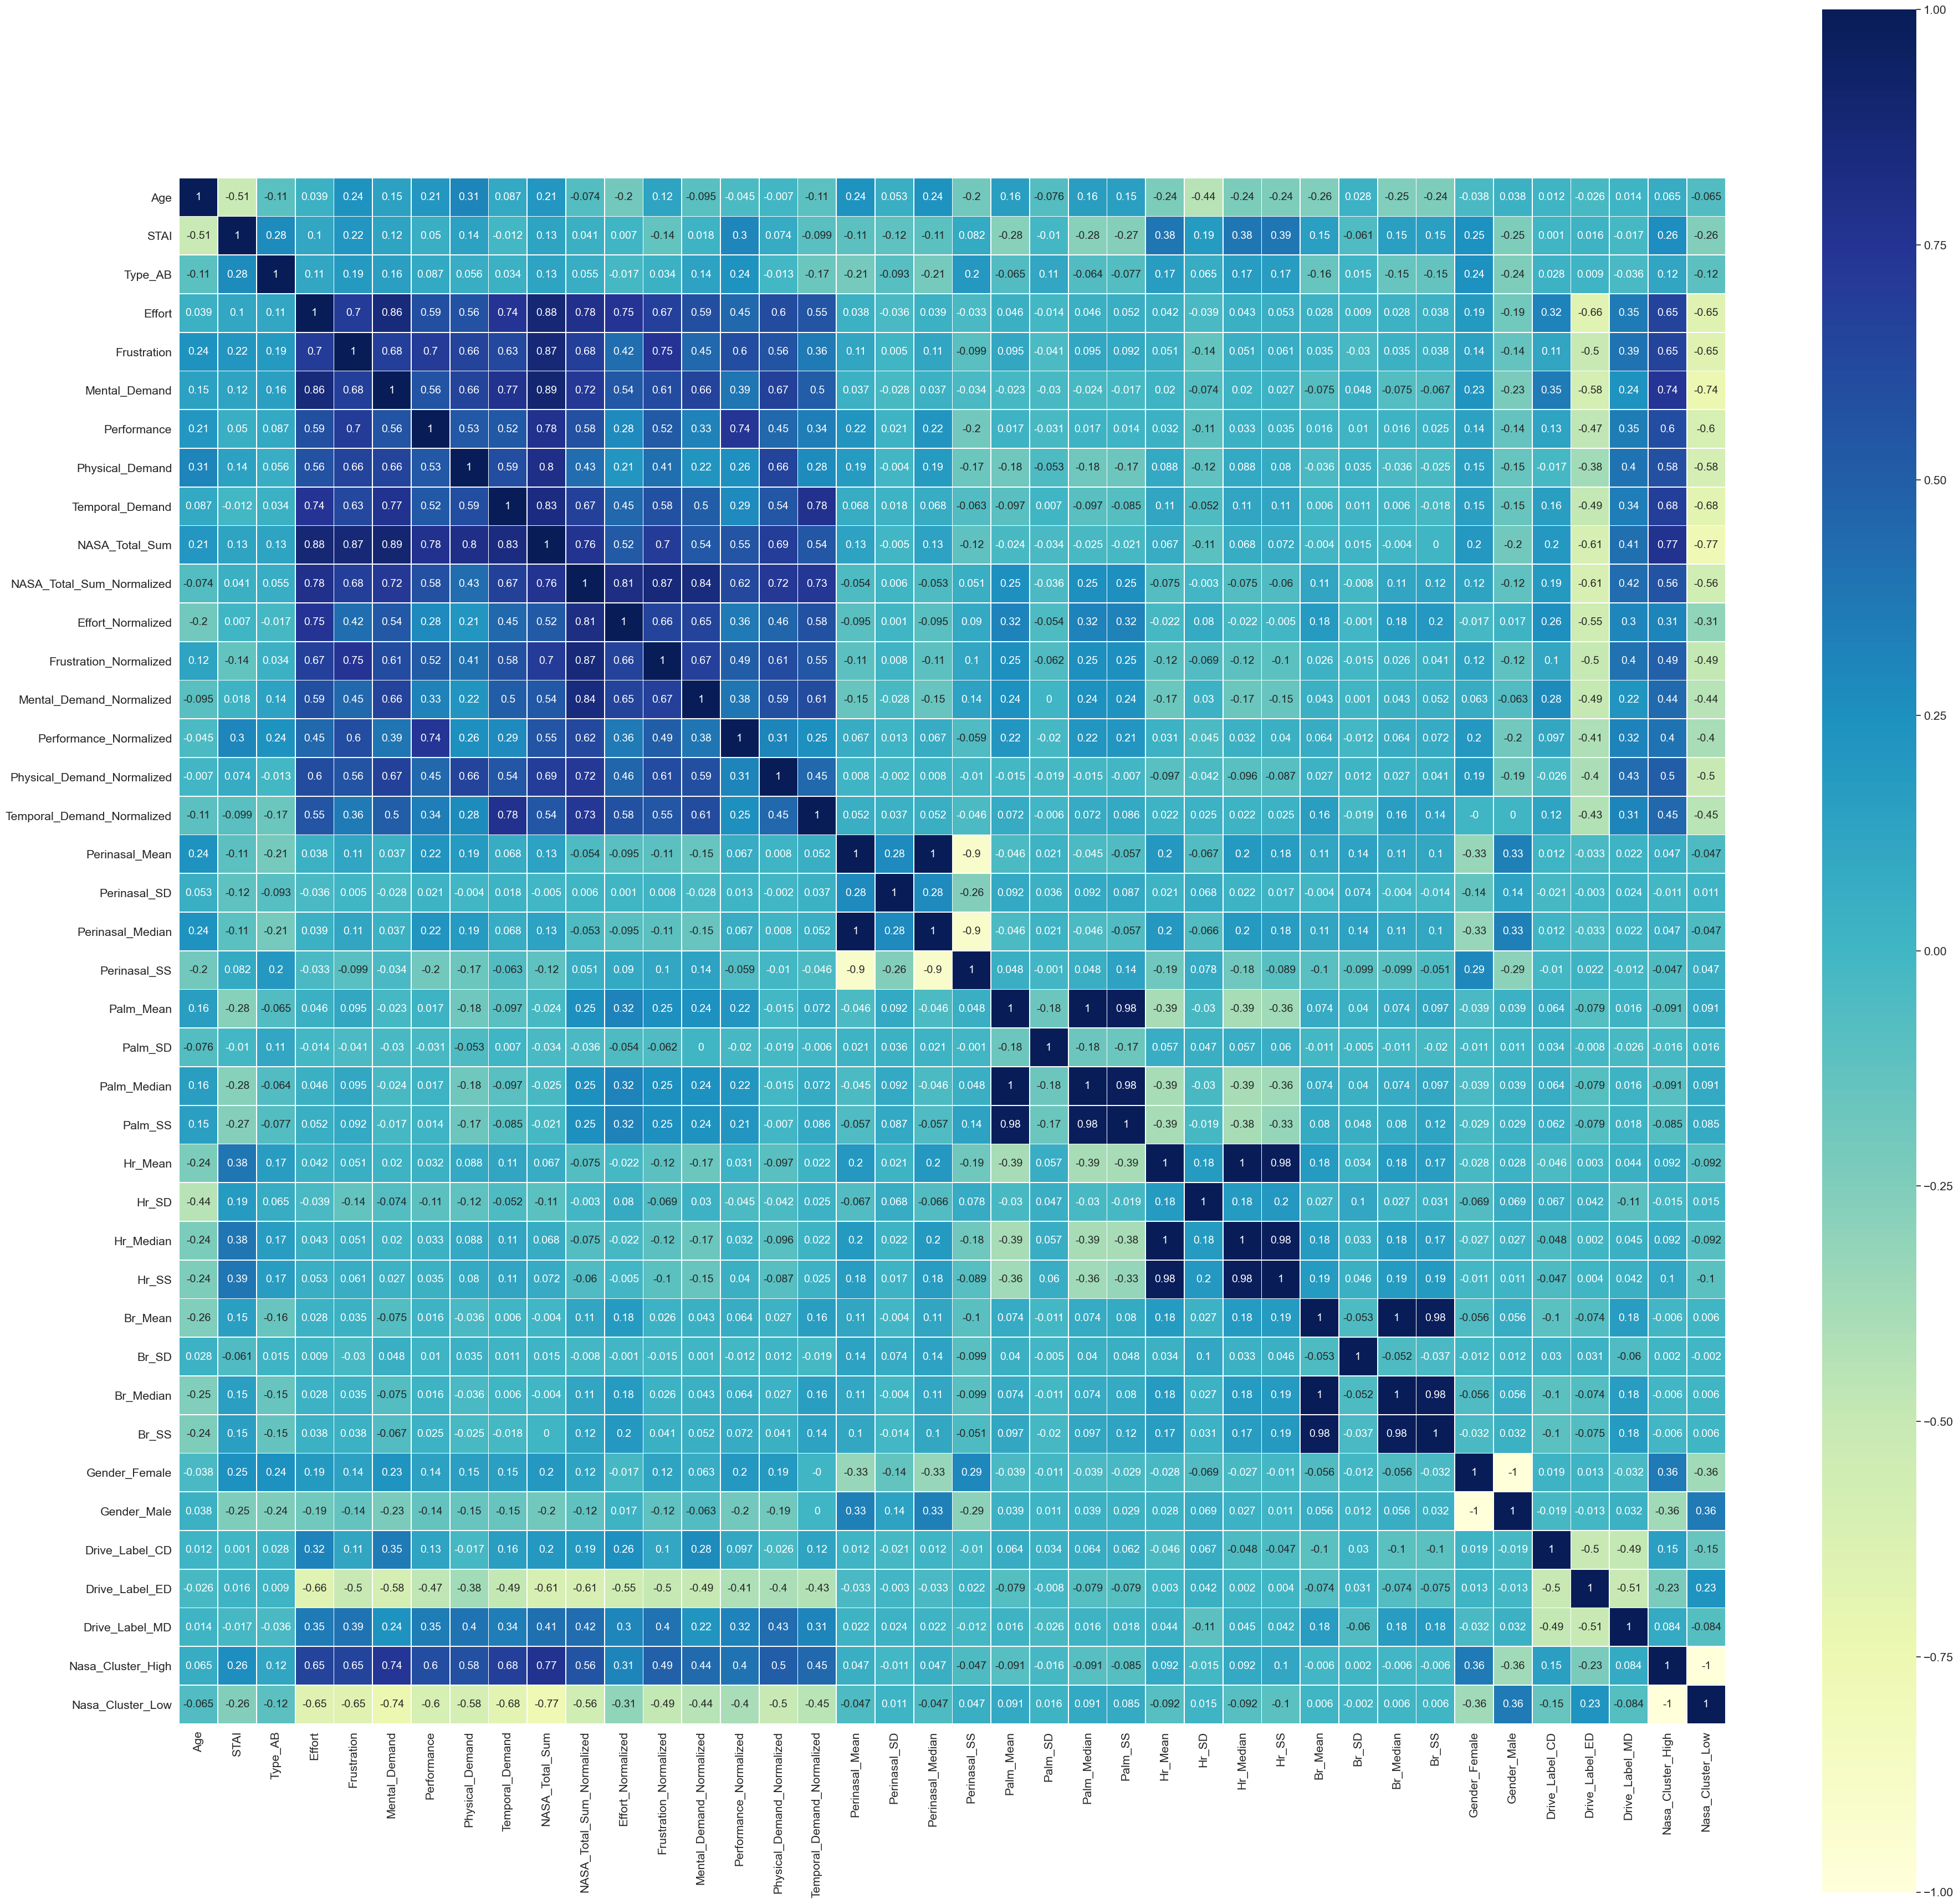

In [37]:
#################
# DO NOT DELETE #
#################



##################################
####----   Old Features   ----####
##################################
# cor_df = final_df.copy()[['Arousal_Mode',
#                           'Perinasal_Mean', 'Perinasal_SD', 'Perinasal_Median', 'Perinasal_SS', 
#                           'Palm_Mean', 'Palm_SD', 'Palm_Median', 'Palm_SS', 
#                           'Hr_Mean', 'Hr_SD', 'Hr_Median', 'Hr_SS', 
#                           'Br_Mean', 'Br_SD', 'Br_Median', 'Br_SS',
#                           'Drive_Label_CD', 'Drive_Label_ED', 
#                           'Drive_Label_FD', 'Drive_Label_MD'
#                            ]]


#############################################
####---- only physiological Features ----####
#############################################
# cor_df = final_df.copy()[['Arousal_Mode', 
#                           'Perinasal_Mean', 'Perinasal_SD',
#                           'Palm_Mean', 'Palm_SD', 
#                           'Hr_Mean', 'Hr_SD',
#                           'Br_Mean', 'Br_SD',
#                           'Drive_Label_CD', 'Drive_Label_ED', 
#                           'Drive_Label_FD', 'Drive_Label_MD'
#                            ]]


##################################
####----   All Features   ----####
##################################
cor_df = final_df.copy()[['Arousal_Mode'] + feature_list]

corr = cor_df.corr().round(3)

plt.figure(figsize=(45, 45))
plt.subplot(1, 1, 1)

# sns.set(font_scale=2)
sns.heatmap(corr, cmap="YlGnBu", center=0, square=True, linewidths=.5, annot=True, annot_kws={"size": 14})


plt.savefig(figure_path + 'correlation_plot.png')
plt.savefig(figure_path + 'correlation_plot.pdf')

plt.show()

In [38]:
##########################
# NON USED CODES
##########################


# IFrame("../../data/sim1/forecasting_markers/figures/pp_arousal_prediction_Cognitive_sd.pdf", width=900, height=600)



# result_df = pd.DataFrame({
#         'actual': y_test,
#         'prediction': y_pred,
#         'err': y_test == y_pred
#     }).sort_values('err', ascending = False)
# result_df.to_csv("../../data/sim1/forecasting_markers/test/result_" + arousal_signal + ".csv", sep=',')










# ########################
# PP -->
# ########################
# Accuracy: 0.779839208410637
# F1: 0.7578831147346705
# Recall: 0.779839208410637
# Precision: 0.7987647247206715

# #################################
# PP --> Best Bootstraping for PP
# #################################
# Accuracy: 0.8556223970384081
# F1: 0.8416228891876154
# Recall: 0.8556223970384081
# Precision: 0.8378525827410469






#########################
# PP_2 -->
#########################
# Accuracy: 0.7414965986394558
# F1: 0.7382594058202663
# Recall: 0.7414965986394558
# Precision: 0.7647435765692131

##################################
# PP_2 --> Best Bootstraping for PP
##################################
# Accuracy: 0.7431744562702453
# F1: 0.7332696262099785
# Recall: 0.7431744562702453
# Precision: 0.736553172654085


    
    
    
    
#########################
# HR -->
#########################
# Accuracy: 0.6487322201607916
# F1: 0.5998199331532664
# Recall: 0.6487322201607916
# Precision: 0.6352522628886266

##################################
# HR --> Best Bootstraping for PP
##################################
# Accuracy: 0.6598796853308654
# F1: 0.659423920692846
# Recall: 0.6598796853308654
# Precision: 0.6590498579113212




#########################
# BR -->
#########################
# Accuracy: 0.6951144094001237
# F1: 0.6916477146798585
# Recall: 0.6951144094001237
# Precision: 0.7030998641785814

##################################
# BR --> Best Bootstraping for PP
##################################
# Accuracy: 0.7366959740860712
# F1: 0.7339665422228959
# Recall: 0.7366959740860712
# Precision: 0.7382492602016391
